In [28]:
import pandas as pd
file_path = "Observations 2012-2025.xlsx"
df = pd.read_excel(file_path)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Aigrette bleue    86 non-null     object
 1   Egretta caerulea  86 non-null     object
 2   Migrateur         85 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


## NOM FRANCAIS

In [30]:
# 定义完整的列名列表
column_names = [
    'Nom_observateur',
    'code_departement', 
    'Nom_transect',
    'date',
    'passage',  # 1er, 2e ou 3e passage
    'nuages',
    'pluie', 
    'vent',
    'visibilite',
    'N_point',
    'heure_debut',
    'ESPECE',
    'dist_25m_Auditif',
    'dist_25m_Visuel',
    'dist_50m_Auditif', 
    'dist_50m_Visuel',
    'dist_100m_Auditif',
    'dist_100m_Visuel',
    'dist_plus100m_Auditif',
    'dist_plus100m_Visuel',
    'vol',
    'total_Auditif',
    'total_Visuel_sans_vol',
    'total_AV_sans_vol',
    'total_AV_avec_vol'
]

In [31]:
obs_data = pd.read_excel(
    file_path,
    sheet_name='NOM FRANÇAIS',
    header=None,      
    skiprows=3,       
    names=column_names,
    index_col=False
)

In [32]:
obs_data.shape

(114495, 25)

In [33]:
obs_data.head()

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_50m_Visuel,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol
0,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
1,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,1.0
2,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2,2.0
3,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
4,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0


## ESPECES

In [34]:
# ESPECES表的列名定义
species_column_names = [
    'nom_francais',     # 法语名称 
    'nom_scientifique', # 学名 
    'statut_migratoire' # 迁徙状态 
]

# 读取ESPECES工作表
species_data = pd.read_excel(file_path, sheet_name='ESPECES', header=0, names=species_column_names)

species_data.head()

,nom_francais,nom_scientifique,statut_migratoire
0,Aigrette garzette,Egretta garzetta,Migrateur
1,Aigrette neigeuse,Egretta thula,Migrateur
2,Aigrette tricolore,Egretta tricolor ruficollis,Migrateur
3,Amazone aourou,Amazona amazonica,Exogène introduit par l'homme
4,Astrild à joues orange,Estrilda melpoda,NaN


## GPS-MILIEU

In [35]:
# GPS-MILIEU表的列名定义
site_column_names = [
    'transect_name',    # 样线名称 (如 Aéroport)
    'utm_x',           # UTM X坐标 (如 714593)
    'utm_y',           # UTM Y坐标 (如 1614233)
    'habitat_type',    # 栖息地类型 (如 Mangrove)
    'site_id',         # 站点ID (如 S1)
    'point_id'         # 点位ID (如 SIPI, S1P2)
]

In [36]:
site_data = pd.read_excel(file_path, sheet_name='GPS-MILIEU',skiprows=2, names=site_column_names)

In [37]:
site_data.head()

,transect_name,utm_x,utm_y,habitat_type,site_id,point_id
0,Aéroport,714416,1614194,Mangrove,S1,S1P2
1,Aéroport,714133,1614141,Mangrove,S1,S1P3
2,Aéroport,713914,1614103,Mangrove,S1,S1P4
3,Aéroport,713719,1614062,Mangrove,S1,S1P5
4,Aéroport,713559,1614036,Mangrove,S1,S1P6


## 1.1 Overview of the dataset structure

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Load and inspect dataset ==========
# 读取观测数据
# obs_data = pd.read_excel(
#     file_path,
#     sheet_name='NOM FRANÇAIS',
#     header=2,
#     names=column_names,
#     index_col=None
# ).dropna(axis=1, how='all')  # 删除空白列

# 打印基本结构信息（表格维度、列名等）
print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {obs_data.shape}")
# print(f"Columns: {list(obs_data.columns)}")

# 检查时间范围
obs_data['date'] = pd.to_datetime(obs_data['date'], errors='coerce')
time_min, time_max = obs_data['date'].min(), obs_data['date'].max()
print(f"Date range: {time_min.date()} to {time_max.date()}")

# 唯一标识符统计（样线、观察者、物种）
unique_transects = obs_data['Nom_transect'].nunique()
unique_observers = obs_data['Nom_observateur'].nunique()
unique_species = obs_data['ESPECE'].nunique()
print(f"Unique transects: {unique_transects}")
print(f"Unique observers: {unique_observers}")
print(f"Unique species: {unique_species}")



=== Dataset Overview ===
Shape (rows, columns): (114495, 25)
Date range: 2014-03-29 to 2025-07-03
Unique transects: 74
Unique observers: 49
Unique species: 103


## 1.2. Observation effort overview 努力量


## Calculate and visualise observation effort over time and across transects.
## 计算并可视化时间和样线维度上的观测努力量

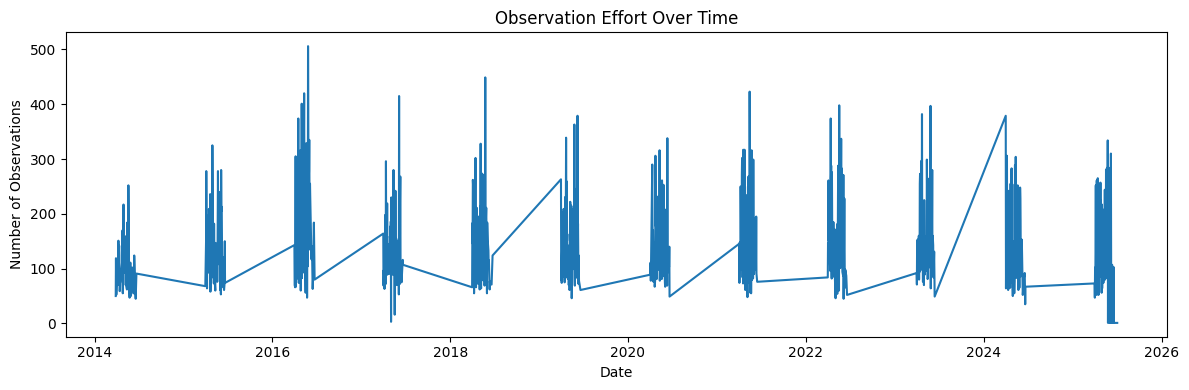

In [39]:
# 2.1 Effort over time (number of observations per day)
# 时间维度上的努力量（每日观测记录数）
effort_by_date = obs_data.groupby('date').size().reset_index(name='n_observations')

plt.figure(figsize=(12, 4))
sns.lineplot(data=effort_by_date, x='date', y='n_observations')
plt.title("Observation Effort Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.tight_layout()
plt.show()

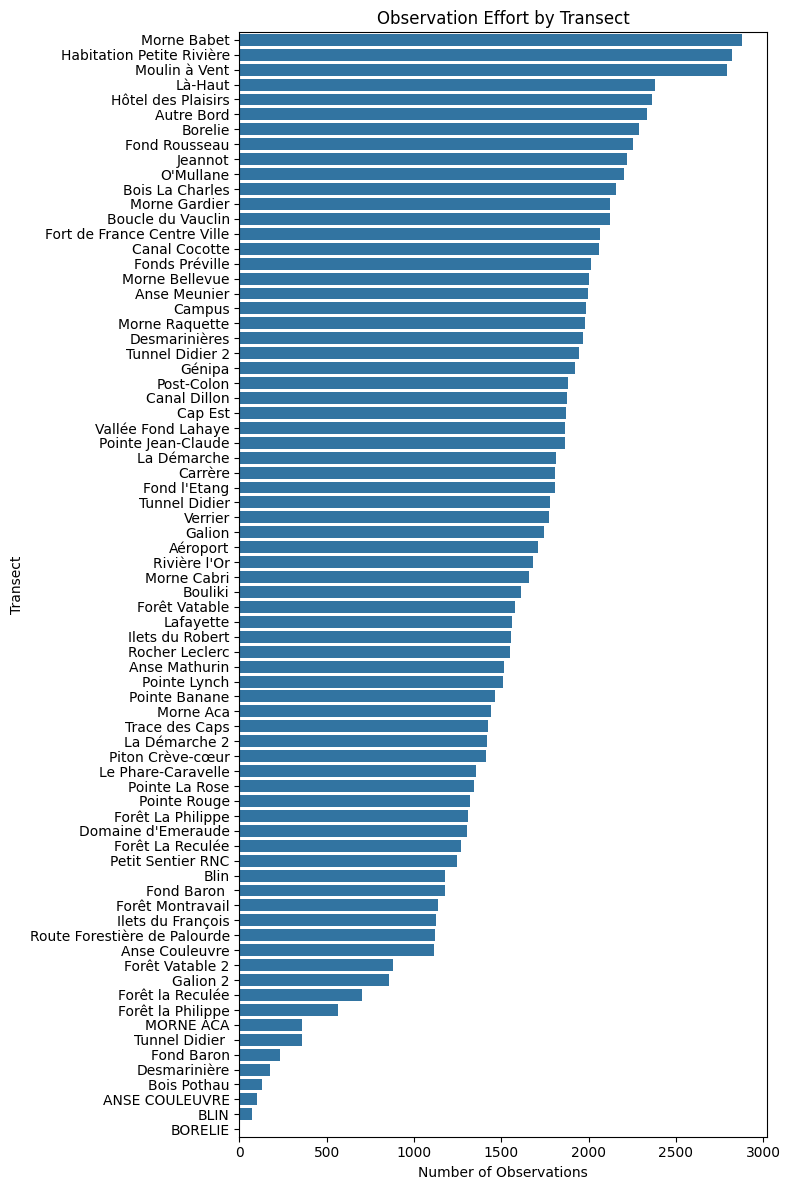

In [40]:
# 2.2 Effort by transect (number of observations per transect)
# 样线维度上的努力量（每条样线观测记录数）
effort_by_transect = obs_data.groupby('Nom_transect').size().sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=effort_by_transect.values, y=effort_by_transect.index)
plt.title("Observation Effort by Transect")
plt.xlabel("Number of Observations")
plt.ylabel("Transect")
plt.tight_layout()
plt.show()

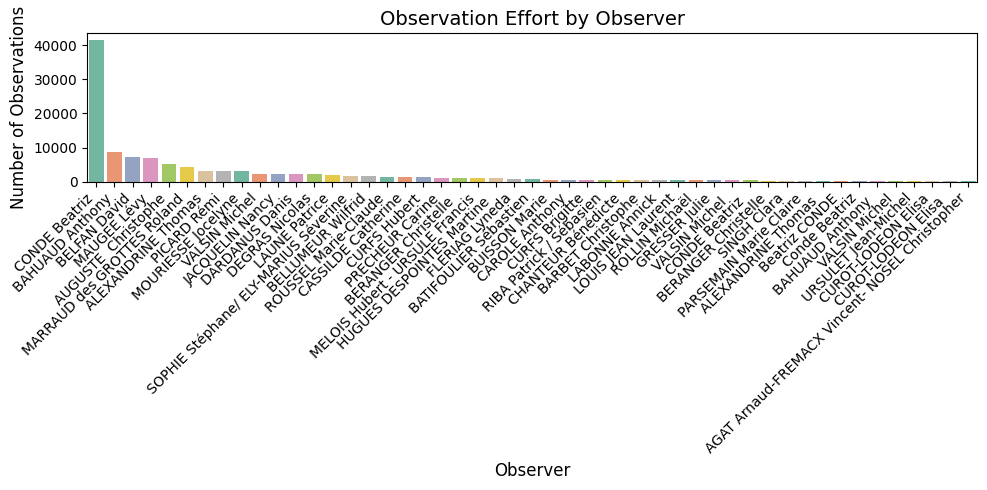

In [41]:
# 2.3 Effort by observer
# 观察者努力量 / 每位观察者观测次数

# 计算每位观察者的观测次数 / Count observations per observer
effort_by_observer = obs_data['Nom_observateur'].value_counts()

# 将 Series 转为 DataFrame / Convert Series to DataFrame
observer_df = effort_by_observer.reset_index()
observer_df.columns = ['Observer', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Observer',
    y='Count',
    data=observer_df,
    hue='Observer',   # 使用 hue 兼容 seaborn 未来版本
    dodge=False,      # 不拆分箱体
    palette="Set2",
    legend=False      # 隐藏图例
)
plt.title("Observation Effort by Observer", fontsize=14)
plt.xlabel("Observer", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
# ## 3. Distribution of species counts
# ## 3. 物种计数分布
# Descriptive statistics for numeric variables related to counts.
# 对计数相关的数值列进行描述性统计

# %%
# Define numeric columns
# 定义数值列 / numeric columns for counts
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Convert numeric columns
# 转换为数值类型 / convert to numeric
obs_data[count_cols] = obs_data[count_cols].apply(pd.to_numeric, errors='coerce')

# Summary statistics
# 数值列描述性统计 / descriptive statistics
count_summary = obs_data[count_cols].describe().T
print("=== Descriptive Statistics for Counts===")
count_summary


=== Descriptive Statistics for Counts===


,count,mean,std,min,25%,50%,75%,max
dist_25m_Auditif,58829.0,1.619694,0.960943,0.000000,1.0,1.0,2.0,40.0
dist_25m_Visuel,39190.0,2.011687,2.567085,0.000000,1.0,1.0,2.0,121.0
dist_50m_Auditif,31148.0,1.298831,0.681653,0.000000,1.0,1.0,1.0,23.0
dist_50m_Visuel,5432.0,2.051178,3.573717,0.000000,1.0,1.0,2.0,100.0
dist_100m_Auditif,8402.0,1.235777,0.667929,0.000000,1.0,1.0,1.0,22.0
dist_100m_Visuel,1531.0,1.951012,4.316356,0.000000,1.0,1.0,2.0,150.0
dist_plus100m_Auditif,2648.0,1.305136,3.979901,0.000000,1.0,1.0,1.0,200.0
dist_plus100m_Visuel,1388.0,4.189481,12.844451,0.000000,1.0,1.0,3.0,200.0
vol,1821.0,1.983526,4.056436,0.000000,1.0,1.0,2.0,80.0
total_Auditif,114255.0,1.305836,1.339722,0.000000,1.0,1.0,2.0,200.0


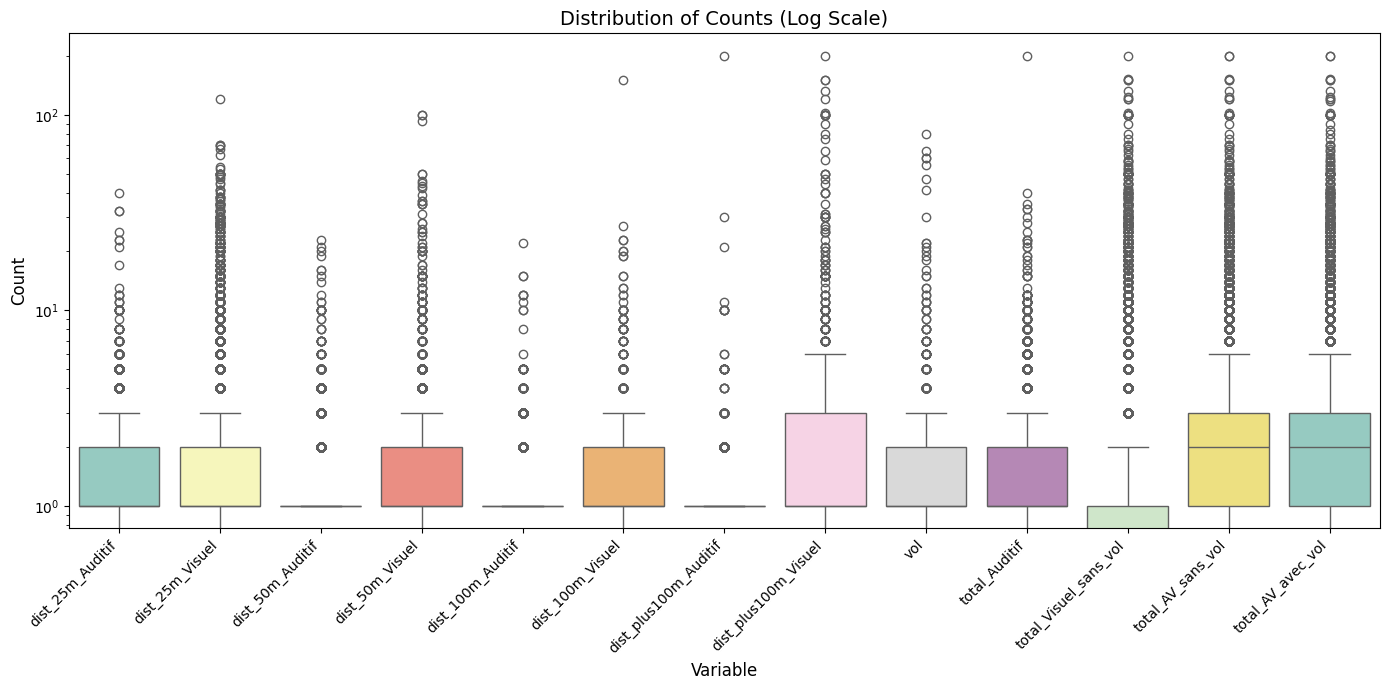

In [43]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [44]:
# ## 4. Weather conditions
# ## 4. 天气条件
# Distribution of environmental descriptors such as clouds, rain, wind, and visibility.
# 天气相关变量（云量、降雨、风力、能见度）的分布

# %%
# Convert weather columns to numeric
# 转换为数值类型 / convert to numeric
weather_cols = ['nuages', 'pluie', 'vent', 'visibilite']
obs_data[weather_cols] = obs_data[weather_cols].apply(pd.to_numeric, errors='coerce')


# Summary statistics
# 描述性统计 / descriptive statistics
weather_summary = obs_data[weather_cols].describe().T
print("=== Weather Conditions Summary / 天气条件描述性统计 ===")
weather_summary

=== Weather Conditions Summary / 天气条件描述性统计 ===


,count,mean,std,min,25%,50%,75%,max
nuages,114493.0,1.968181,0.698651,1.0,1.0,2.0,2.0,3.0
pluie,114494.0,1.029355,0.177576,1.0,1.0,1.0,1.0,3.0
vent,114478.0,1.422885,0.600866,-5.0,1.0,1.0,2.0,3.0
visibilite,114494.0,1.419559,0.619856,1.0,1.0,1.0,2.0,4.0


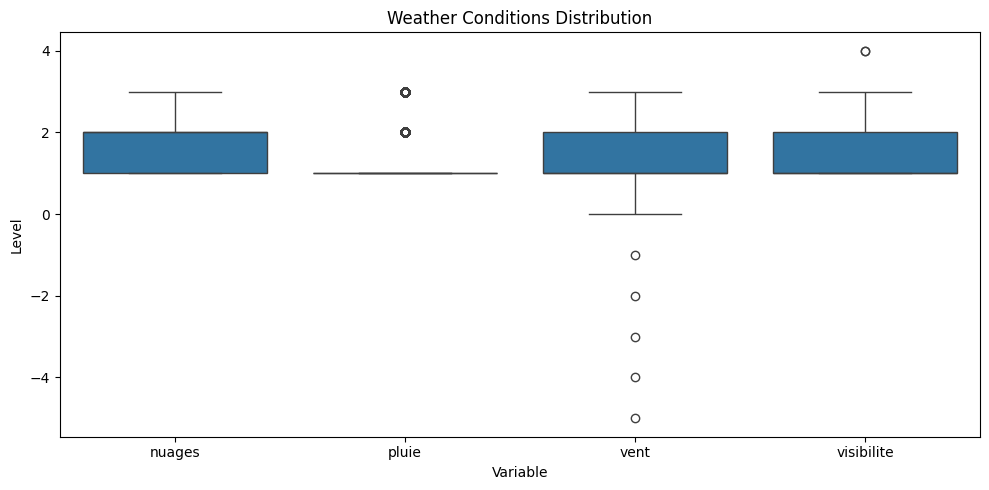

In [45]:
# Boxplot for weather variables
# 天气条件箱线图 / boxplot
plt.figure(figsize=(10, 5))
melted_weather = obs_data[weather_cols].melt(var_name='Variable', value_name='Level')
sns.boxplot(x='Variable', y='Level', data=melted_weather)
plt.title("Weather Conditions Distribution")
plt.ylabel("Level")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()

In [46]:
# ## 5. Data Quality Check
# ## 5. 数据质量检查
# Check missing values, negative counts, and duplicates.

# %%
# 5.1 Missing values
# 缺失值 / missing value ratio
missing_pct = obs_data.isnull().mean().sort_values(ascending=False) * 100
# 每列缺失值比例
print("=== Missing value ratio per column (%)===")
print(missing_pct)


=== Missing value ratio per column (%)===
dist_plus100m_Visuel     98.787720
dist_100m_Visuel         98.662824
vol                      98.409538
dist_plus100m_Auditif    97.687235
dist_50m_Visuel          95.255688
dist_100m_Auditif        92.661688
dist_50m_Auditif         72.795319
dist_25m_Visuel          65.771431
dist_25m_Auditif         48.618717
total_Auditif             0.209616
vent                      0.014848
total_AV_sans_vol         0.005240
total_Visuel_sans_vol     0.003494
code_departement          0.001747
nuages                    0.001747
pluie                     0.000873
visibilite                0.000873
date                      0.000000
Nom_transect              0.000000
passage                   0.000000
Nom_observateur           0.000000
heure_debut               0.000000
N_point                   0.000000
ESPECE                    0.000000
total_AV_avec_vol         0.000000
dtype: float64


In [47]:
# 5.2 Negative values
# 负数检测 / check for negative counts
abnormal_counts = {}
for col in count_cols:
    n_neg = (obs_data[col] < 0).sum()
    if n_neg > 0:
        abnormal_counts[col] = n_neg
if abnormal_counts:
    print("Negative values found in columns：", abnormal_counts)
else:
    print("No negative values detected in count columns")


Negative values found in columns： {'total_Visuel_sans_vol': np.int64(4)}


In [48]:
obs_data

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_50m_Visuel,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2.0,2.0
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,2.0
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,2.0
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,2.0,NaN,NaN,NaN,NaN,3.0,0.0,3.0,3.0


# Data Preprocessing / 数据预处理
# Clean and prepare the observation dataset before analysis
# 对观测数据进行清理和预处理，为后续分析做准备

In [49]:
obs_data_cleaned = obs_data.copy()

## 重复行

Number of duplicate records: 2243


/tmp/ipykernel_55592/103442572.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_duplicate', data=obs_data_cleaned, palette=['skyblue','salmon'])


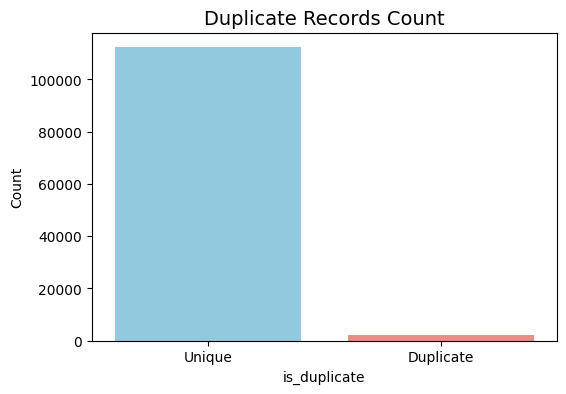

In [50]:
# %% [markdown]
# ### 2. Duplicate Records / 重复记录

# %%
# 判断重复行数量 / Count duplicate rows
num_duplicates = obs_data_cleaned.duplicated().sum()
print(f"Number of duplicate records: {num_duplicates}")

# 可视化重复值分布 / Visualize duplicates
# 创建一个新列标记重复 / Add a column indicating duplicate rows
obs_data_cleaned['is_duplicate'] = obs_data_cleaned.duplicated()

plt.figure(figsize=(6,4))
sns.countplot(x='is_duplicate', data=obs_data_cleaned, palette=['skyblue','salmon'])
plt.xticks([0,1], ['Unique', 'Duplicate'])
plt.title("Duplicate Records Count", fontsize=14)
plt.ylabel("Count")
plt.show()

In [51]:
# 删除整行重复 / Remove full row duplicates
obs_data_cleaned = obs_data_cleaned.drop_duplicates()

In [52]:
obs_data_cleaned.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
114490    False
114491    False
114492    False
114493    False
114494    False
Length: 114491, dtype: bool

## 缺失值，重复值

In [53]:
# %% [markdown]
# ## Count Missing Values per Column

# %%
# Calculate number of missing values for each column
missing_counts = obs_data.isna().sum()

# Convert to DataFrame for nicer display
missing_df = missing_counts.reset_index()
missing_df.columns = ['Column', 'MissingCount']

# Display missing values table
missing_df.sort_values(by='MissingCount', ascending=False)

,Column,MissingCount
19,dist_plus100m_Visuel,113107
17,dist_100m_Visuel,112964
20,vol,112674
18,dist_plus100m_Auditif,111847
15,dist_50m_Visuel,109063
16,dist_100m_Auditif,106093
14,dist_50m_Auditif,83347
13,dist_25m_Visuel,75305
12,dist_25m_Auditif,55666
21,total_Auditif,240


In [54]:
# %% [markdown]
# ## Missing Values and Duplicate Records Visualization for obs_data
# ## 对 obs_data 的缺失值与重复记录可视化

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # 用于可视化缺失值

# %% [markdown]
# ### 1. Missing Values / 缺失值

# %%
# 可视化缺失值矩阵 / Visualize missing values matrix
plt.figure(figsize=(12,6))
msno.matrix(obs_data)
plt.title("Missing Values Matrix", fontsize=14)
plt.show()

# 可视化缺失值热力图 / Heatmap of missing values
plt.figure(figsize=(12,6))
msno.heatmap(obs_data)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()


ModuleNotFoundError: No module named 'missingno'

## 
## 距离带计数列的缺失值全部填充为 0
## 计数列（total_Auditif、total_Visuel_sans_vol、total_AV_sans_vol）：用其余距离带的总和重新计算填充缺失值。
## 环境列（vent、nuages、visibilite、pluie）：使用列的平均值填充缺失值。

In [ ]:
# %%
# Remove rows with missing key information (date, transect, point) / 删除关键列缺失行
obs_data_cleaned = obs_data.dropna(subset=['date', 'Nom_transect','code_departement', 'N_point'])
obs_data_cleaned.shape


(114493, 25)

In [ ]:
# %% [markdown]
# ## 2. Convert numeric columns / 转换数值列为数值型

# %%
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Ensure working on a copy to avoid SettingWithCopyWarning
obs_data_cleaned = obs_data_cleaned.copy()

# Convert to numeric safely using .loc
obs_data_cleaned.loc[:, count_cols] = obs_data_cleaned.loc[:, count_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# %% [markdown]
# ## Fill missing values in distance-based count columns with 0

# %%
# List of distance-based count columns
distance_count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol'
]

# Fill missing values with 0
obs_data_cleaned[distance_count_cols] = obs_data_cleaned[distance_count_cols].fillna(0)

In [ ]:
# %% [markdown]
# ## Fill Missing Values in obs_data

# %%
import numpy as np

# List of count columns used to recalc totals
count_cols_for_total = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol'
]

# Fill missing total_Auditif by summing relevant columns
missing_total_auditif_idx = obs_data_cleaned['total_Auditif'].isna()
obs_data_cleaned.loc[missing_total_auditif_idx, 'total_Auditif'] = obs_data_cleaned.loc[missing_total_auditif_idx, 
                                                                     ['dist_25m_Auditif', 'dist_50m_Auditif', 
                                                                      'dist_100m_Auditif', 'dist_plus100m_Auditif', 
                                                                      'vol']].sum(axis=1)

# Fill missing total_Visuel_sans_vol
missing_total_visuel_idx = obs_data_cleaned['total_Visuel_sans_vol'].isna()
obs_data_cleaned.loc[missing_total_visuel_idx, 'total_Visuel_sans_vol'] = obs_data_cleaned.loc[missing_total_visuel_idx, 
                                                                              ['dist_25m_Visuel', 'dist_50m_Visuel', 
                                                                               'dist_100m_Visuel', 'dist_plus100m_Visuel']].sum(axis=1)

# Fill missing total_AV_sans_vol
missing_total_av_idx = obs_data_cleaned['total_AV_sans_vol'].isna()
obs_data_cleaned.loc[missing_total_av_idx, 'total_AV_sans_vol'] = (obs_data_cleaned.loc[missing_total_av_idx, 
                                                                       ['total_Auditif', 'total_Visuel_sans_vol']].sum(axis=1))

# Fill weather/environment columns with mean
for col in ['vent', 'nuages', 'visibilite', 'pluie']:
    mean_val = obs_data_cleaned[col].mean()
    obs_data_cleaned[col] = obs_data_cleaned[col].fillna(mean_val)

In [ ]:
missing_counts = obs_data_cleaned.isna().sum()
print(missing_counts)

Nom_observateur          0
code_departement         0
Nom_transect             0
date                     0
passage                  0
nuages                   0
pluie                    0
vent                     0
visibilite               0
N_point                  0
heure_debut              0
ESPECE                   0
dist_25m_Auditif         0
dist_25m_Visuel          0
dist_50m_Auditif         0
dist_50m_Visuel          0
dist_100m_Auditif        0
dist_100m_Visuel         0
dist_plus100m_Auditif    0
dist_plus100m_Visuel     0
vol                      0
total_Auditif            0
total_Visuel_sans_vol    0
total_AV_sans_vol        0
total_AV_avec_vol        0
dtype: int64


In [ ]:
# %% [markdown]
# ## 6. Create auxiliary columns / 创建辅助列

# %%
# Extract year and month / 提取年份和月份
# 使用 .loc 显式赋值 / Use .loc to avoid SettingWithCopyWarning
obs_data_cleaned.loc[:, 'year'] = obs_data_cleaned['date'].dt.year
obs_data_cleaned.loc[:, 'month'] = obs_data_cleaned['date'].dt.month

In [ ]:
obs_data_cleaned

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol,year,month
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2014,4
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2014,4
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025,5
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2025,5
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025,5
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,2025,5


## 处理天气异常值

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2248936828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


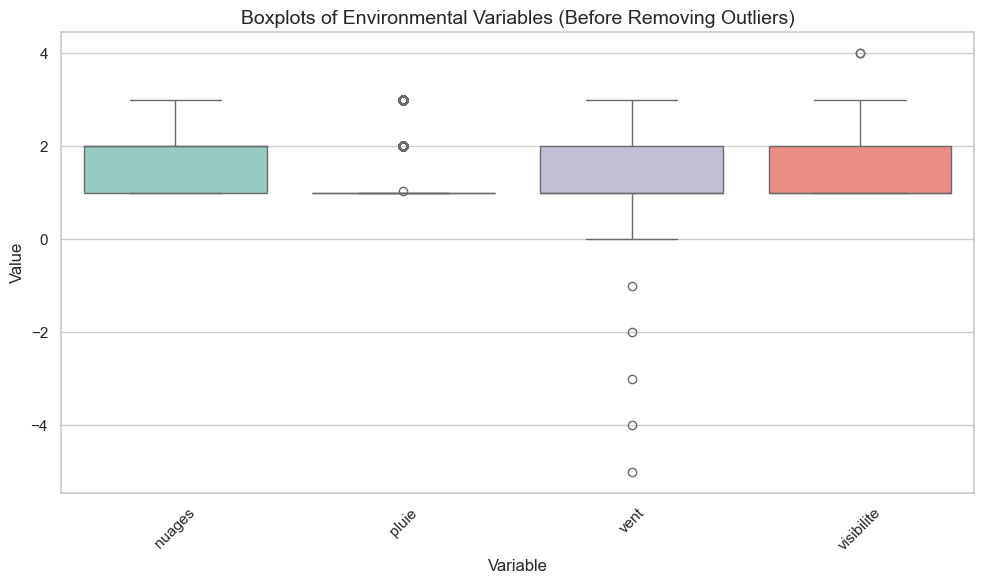

In [ ]:
# %% [markdown]
# ## Boxplots of environmental variables / 环境变量箱线图（未删除异常值）
# Visualize distributions of nuages, pluie, vent, visibilite / 可视化云量、降雨、风力、能见度分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data = obs_data_cleaned[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data,
    palette="Set3"
)
plt.title("Boxplots of Environmental Variables (Before Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
obs_data['vent'].unique()

array([ 1.,  2.,  3., nan,  0., -1., -2., -3., -4., -5.])

In [ ]:
obs_data_cleaned["vent"].value_counts().sort_index()

vent
-5.000000        1
-4.000000        1
-3.000000        1
-2.000000        1
-1.000000        1
 0.000000        1
 1.000000    72680
 1.422875       17
 2.000000    35150
 3.000000     6640
Name: count, dtype: int64

In [ ]:
obs_data['nuages'].unique()

array([ 2.,  3.,  1., nan])

In [ ]:
obs_data["nuages"].value_counts().sort_index()

nuages
1.0    29822
2.0    58492
3.0    26179
Name: count, dtype: int64

In [ ]:
obs_data['pluie'].unique()

array([ 1.,  2.,  3., nan])

In [ ]:
obs_data['pluie'].value_counts().sort_index()

pluie
1.0    111307
2.0      3013
3.0       174
Name: count, dtype: int64

In [ ]:
obs_data['visibilite'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [ ]:
obs_data['visibilite'].value_counts().sort_index()

visibilite
1.0    74509
2.0    31935
3.0     8048
4.0        2
Name: count, dtype: int64

In [ ]:
# # %% [markdown]
# # ## Remove outliers in environmental columns / 删除环境列中的异常值
# # Use IQR method to filter extreme values / 使用 IQR 方法过滤极端值
# 
# # %%
# # List of environmental columns / 环境列
# env_cols = ['nuages', 'pluie', 'vent', 'visibilite']
# 
# # Copy the DataFrame to avoid modifying original / 复制一份数据
# obs_data_no_outliers = obs_data_cleaned.copy()
# 
# for col in env_cols:
#     # Convert to numeric in case of strings / 转为数值型
#     obs_data_no_outliers[col] = pd.to_numeric(obs_data_no_outliers[col], errors='coerce')
#     
#     # Calculate Q1, Q3 and IQR / 计算四分位数和 IQR
#     Q1 = obs_data_no_outliers[col].quantile(0.25)
#     Q3 = obs_data_no_outliers[col].quantile(0.75)
#     IQR = Q3 - Q1
#     
#     # Define bounds / 定义上下界
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     
#     # Filter out outliers / 删除异常值
#     obs_data_no_outliers = obs_data_no_outliers[
#         (obs_data_no_outliers[col] >= lower_bound) & (obs_data_no_outliers[col] <= upper_bound)
#     ]
# 
# # %% [markdown]
# # ## Check results / 检查处理后的数据
# print("Shape after removing environmental outliers / 删除异常值后数据维度:", obs_data_no_outliers.shape)
# print("Remaining environmental data ranges / 剩余环境列范围:")
# print(obs_data_no_outliers[env_cols].describe())

In [ ]:
# 删除vent为负的异常值，将vent=3，pluie=2,3，visibilite=4标记为极端天气
obs_data_cleaned = obs_data_cleaned[obs_data_cleaned["vent"] > 0].copy()

In [ ]:
# %% [markdown]
# ## 标记极端天气记录
# ## Mark Extreme Weather Records

# %%
# 定义极端天气条件
# Extreme weather conditions:
# vent = 3 (strong wind)
# pluie = 3 (heavy rain)
# visibilite = 3 or 4 (poor visibility)
obs_data_cleaned["is_extreme_weather"] = (
    (obs_data_cleaned["vent"] == 3) |
    (obs_data_cleaned["pluie"].isin([2,3])) |
    (obs_data_cleaned["visibilite"].isin([4]))
)

# 检查极端天气记录数量 / Count extreme weather records
extreme_count = obs_data_cleaned["is_extreme_weather"].sum()
print(f"Number of extreme weather records / 极端天气记录数量: {extreme_count}")

# 查看前几行
obs_data_cleaned[["vent","nuages", "pluie", "visibilite", "is_extreme_weather"]].head(10)

Number of extreme weather records / 极端天气记录数量: 9490


,vent,nuages,pluie,visibilite,is_extreme_weather
0,1.0,2.0,1.0,1.0,False
1,1.0,2.0,1.0,1.0,False
2,1.0,2.0,1.0,1.0,False
3,1.0,2.0,1.0,1.0,False
4,1.0,2.0,1.0,1.0,False
5,1.0,2.0,1.0,1.0,False
6,1.0,2.0,1.0,1.0,False
7,1.0,2.0,1.0,1.0,False
8,1.0,2.0,1.0,1.0,False
9,1.0,2.0,1.0,1.0,False


/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/441264105.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


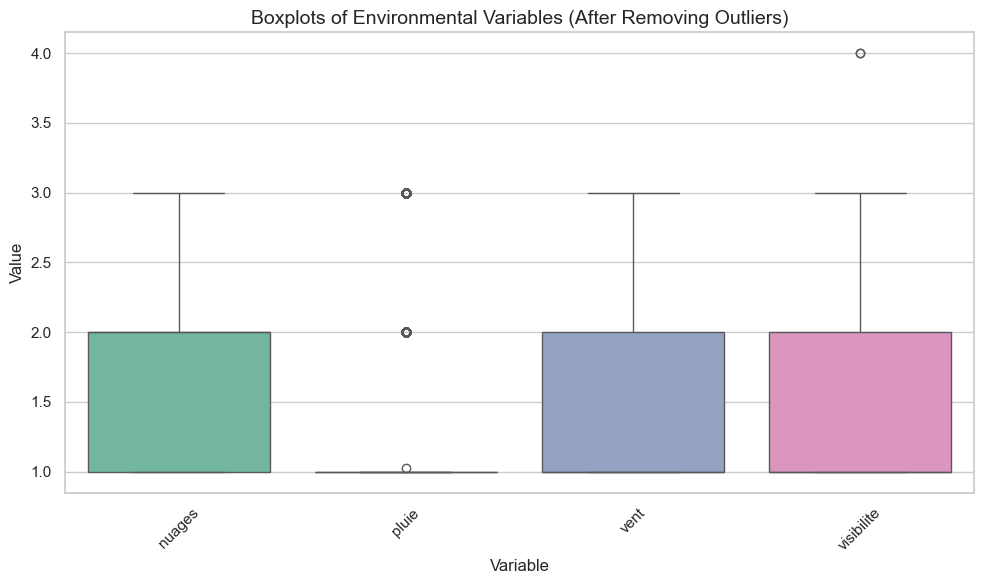

In [ ]:
# %% [markdown]
# ## Boxplots of environmental variables after removing outliers / 删除异常值后的环境变量箱线图
# Visualize distributions after outlier removal / 删除异常值后可视化环境列分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data_after = obs_data_cleaned[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data_after,
    palette="Set2"
)
plt.title("Boxplots of Environmental Variables (After Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/256666084.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather_type", y="total_AV_avec_vol", data=weather_counts, palette=["skyblue", "lightgreen"])


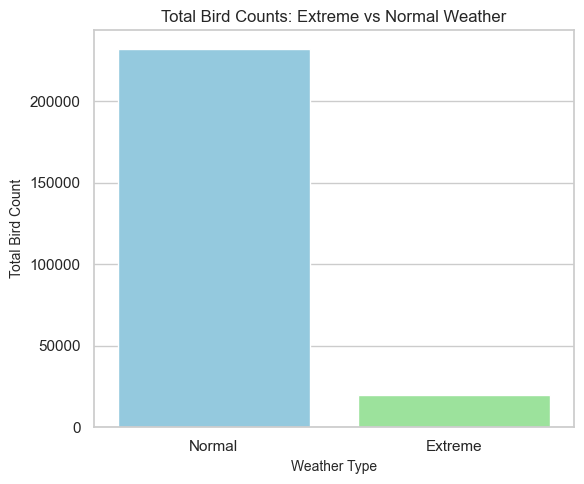

In [ ]:
# %% [markdown]
# ## Compare Bird Counts in Extreme vs Normal Weather
# ## 极端天气与正常天气的鸟类数量比较

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# 分组统计总鸟类数量 / Group by extreme weather
weather_counts = obs_data_cleaned.groupby("is_extreme_weather")["total_AV_avec_vol"].sum().reset_index()
weather_counts["weather_type"] = weather_counts["is_extreme_weather"].map({True: "Extreme", False: "Normal"})

# 绘制柱状图 / Bar plot
plt.figure(figsize=(6,5))
sns.barplot(x="weather_type", y="total_AV_avec_vol", data=weather_counts, palette=["skyblue", "lightgreen"])
plt.title("Total Bird Counts: Extreme vs Normal Weather", fontsize=12)
plt.xlabel("Weather Type", fontsize=10)
plt.ylabel("Total Bird Count", fontsize=10)
plt.tight_layout()
plt.show()

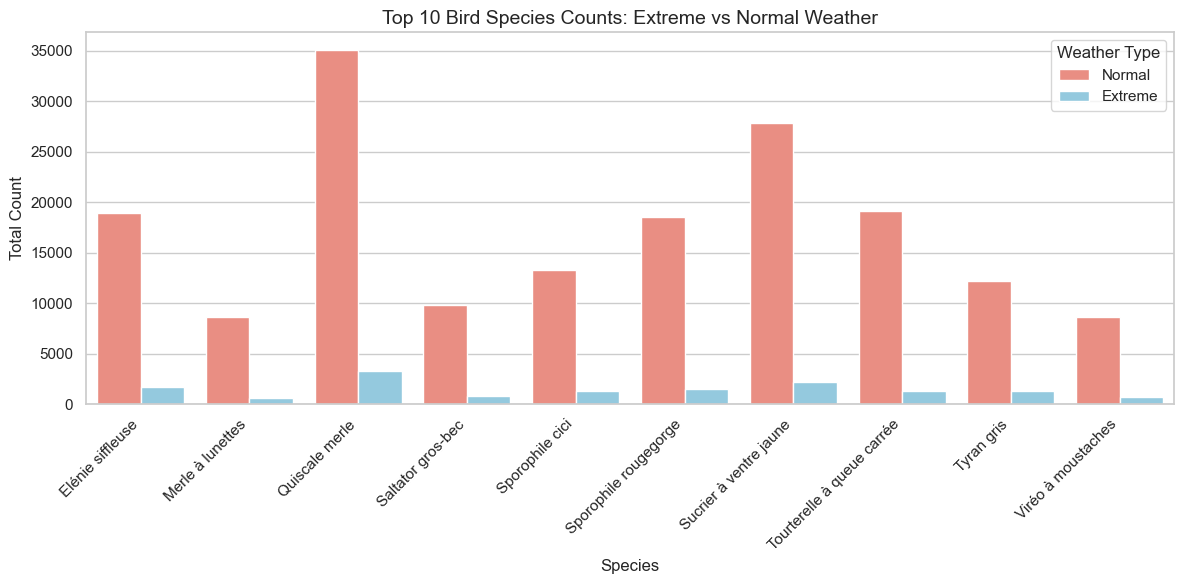

In [ ]:
# %% [markdown]
# ## Compare Top 10 Bird Species in Extreme vs Normal Weather
# ## 比较极端天气与正常天气下前10种鸟类的数量

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 统计每种鸟类总数量 / Total counts per species
species_totals = obs_data_cleaned.groupby("ESPECE")["total_AV_avec_vol"].sum().sort_values(ascending=False)

# 取前10种鸟类 / Top 10 species
top10_species = species_totals.head(10).index.tolist()

# 筛选前10种鸟的数据 / Filter top 10 species data
top10_data = obs_data_cleaned[obs_data_cleaned["ESPECE"].isin(top10_species)].copy()

# 按物种和极端天气分组，计算总计 / Aggregate total counts by species and weather
top10_weather_counts = top10_data.groupby(["ESPECE", "is_extreme_weather"])["total_AV_avec_vol"].sum().reset_index()
top10_weather_counts["weather_type"] = top10_weather_counts["is_extreme_weather"].map({True: "Extreme", False: "Normal"})

# 绘制分组柱状图 / Grouped bar plot
plt.figure(figsize=(12,6))
sns.barplot(x="ESPECE", y="total_AV_avec_vol", hue="weather_type", data=top10_weather_counts, palette=["salmon", "skyblue"])
plt.title("Top 10 Bird Species Counts: Extreme vs Normal Weather", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Weather Type")
plt.tight_layout()
plt.show()

## 计数异常值处理

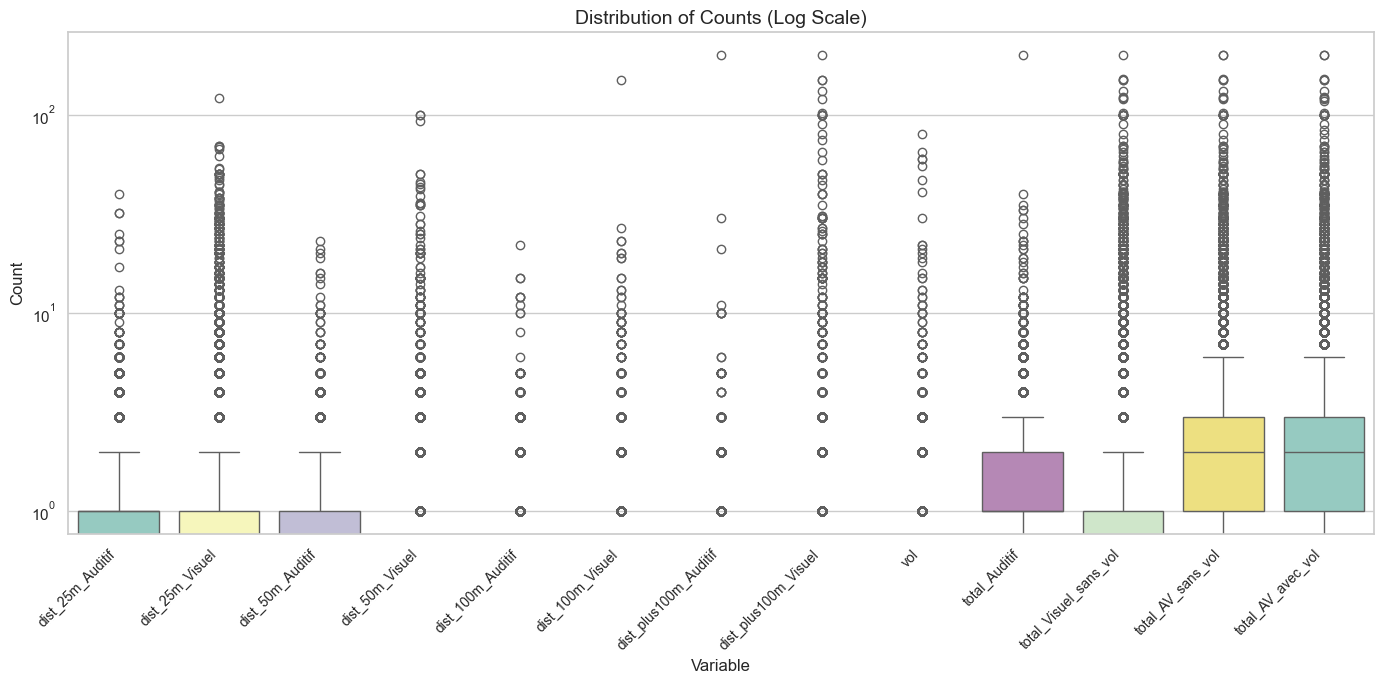

In [ ]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data_cleaned[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# # %% [markdown]
# # ## Winsorize bird count columns / 对鸟类计数列进行上下 1% 分位数裁剪
# # 将低于 1% 的值设为 1% 分位数，将高于 99% 的值设为 99% 分位数
# 
# # %%
# import numpy as np
# 
# # List of bird count columns / 鸟类计数列
# count_cols = [
#     'dist_25m_Auditif', 'dist_25m_Visuel',
#     'dist_50m_Auditif', 'dist_50m_Visuel',
#     'dist_100m_Auditif', 'dist_100m_Visuel',
#     'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
#     'vol', 'total_Auditif', 'total_Visuel_sans_vol',
#     'total_AV_sans_vol', 'total_AV_avec_vol'
# ]
# 
# # Copy DataFrame / 复制数据
# # obs_data_winsor = obs_data_cleaned.copy()
# obs_data_winsor = obs_data_cleaned.copy()
# 
# # Apply winsorization / 上下分位数裁剪
# for col in count_cols:
#     lower = obs_data_winsor[col].quantile(0.01)  # 1% 分位数
#     upper = obs_data_winsor[col].quantile(0.99)  # 99% 分位数
#     obs_data_winsor[col] = obs_data_winsor[col].clip(lower, upper)  # 裁剪
# 
# # %% [markdown]
# # ## Boxplots after winsorization / 上下1%分位数裁剪后的箱线图
# # Visualize bird count distributions / 可视化鸟类计数分布
# 
# # %%
# import seaborn as sns
# import matplotlib.pyplot as plt
# 
# # Melt dataframe for plotting / 转成长表
# plot_data = obs_data_winsor[count_cols].melt(var_name='Variable', value_name='Value')
# 
# # Plot boxplots / 绘制箱线图
# plt.figure(figsize=(14, 6))
# sns.boxplot(
#     x='Variable',
#     y='Value',
#     data=plot_data,
#     palette="Set3"
# )
# plt.title("Bird Count Distributions After Winsorization (1%-99%)", fontsize=14)
# plt.ylabel("Count", fontsize=12)
# plt.xlabel("Variable", fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [ ]:
# # %% [markdown]
# # ## Remove extreme outliers / 删除极端异常值
# # 删除所有鸟类计数中任意列低于1%或高于99%分位数的行
# 
# # %%
# # 复制数据
# obs_data_no_outliers = obs_data_cleaned.copy()
# 
# # 计算各列的分位数阈值
# thresholds = {}
# for col in count_cols:
#     lower = obs_data_no_outliers[col].quantile(0.01)
#     upper = obs_data_no_outliers[col].quantile(0.99)
#     thresholds[col] = (lower, upper)
# 
# # 逐列筛选，删除超出范围的记录
# for col, (lower, upper) in thresholds.items():
#     obs_data_no_outliers = obs_data_no_outliers[
#         (obs_data_no_outliers[col] >= lower) &
#         (obs_data_no_outliers[col] <= upper)
#     ]
# 
# # 打印删除后的结果
# print(f"删除异常值后剩余数据量: {len(obs_data_no_outliers)} 条记录")
# 
# # %% [markdown]
# # ## Boxplots after removing outliers / 删除异常值后的箱线图
# 
# # %%
# # 将删除异常值后的数据转成长表
# plot_data_no_outliers = obs_data_no_outliers[count_cols].melt(
#     var_name='Variable',
#     value_name='Value'
# )
# 
# # 绘制箱线图
# plt.figure(figsize=(14, 6))
# sns.boxplot(
#     x='Variable',
#     y='Value',
#     data=plot_data_no_outliers,
#     palette="Pastel1"
# )
# plt.title("Bird Count Distributions After Removing Outliers / 删除异常值后的鸟类计数分布", fontsize=14)
# plt.ylabel("Count / 计数", fontsize=12)
# plt.xlabel("Variable / 变量", fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# ## 各计数指标的密度图 / Density plots for each count variable
# 由于存在大量0值，因此箱线图效果不佳，改用密度图展示单个变量分布

In [ ]:
# # 一张一张图
# # %%
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # 设置 Seaborn 风格 / Set Seaborn style
# sns.set(style="whitegrid")
# 
# # 遍历每一个计数列 / Loop through each count variable
# for col in count_cols:
#     plt.figure(figsize=(8, 5))
#     
#     # 绘制密度图 / Draw KDE plot for current variable
#     sns.kdeplot(
#         data=obs_data_no_outliers,
#         x=col,
#         fill=True,
#         color='skyblue',
#         alpha=0.5,
#         linewidth=1.5
#     )
#     
#     # 添加标题和标签 / Add titles and labels
#     plt.title(f"Density Distribution of {col}", fontsize=13)
#     plt.xlabel("Count", fontsize=12)
#     plt.ylabel("Density", fontsize=12)
#     plt.grid(alpha=0.3)
#     plt.tight_layout()
#     plt.show()

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2940172503.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2940172503.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2940172503.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2940172503.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2940172503.py:23: UserWarning: Dataset has 0 variance; skipping density estimat

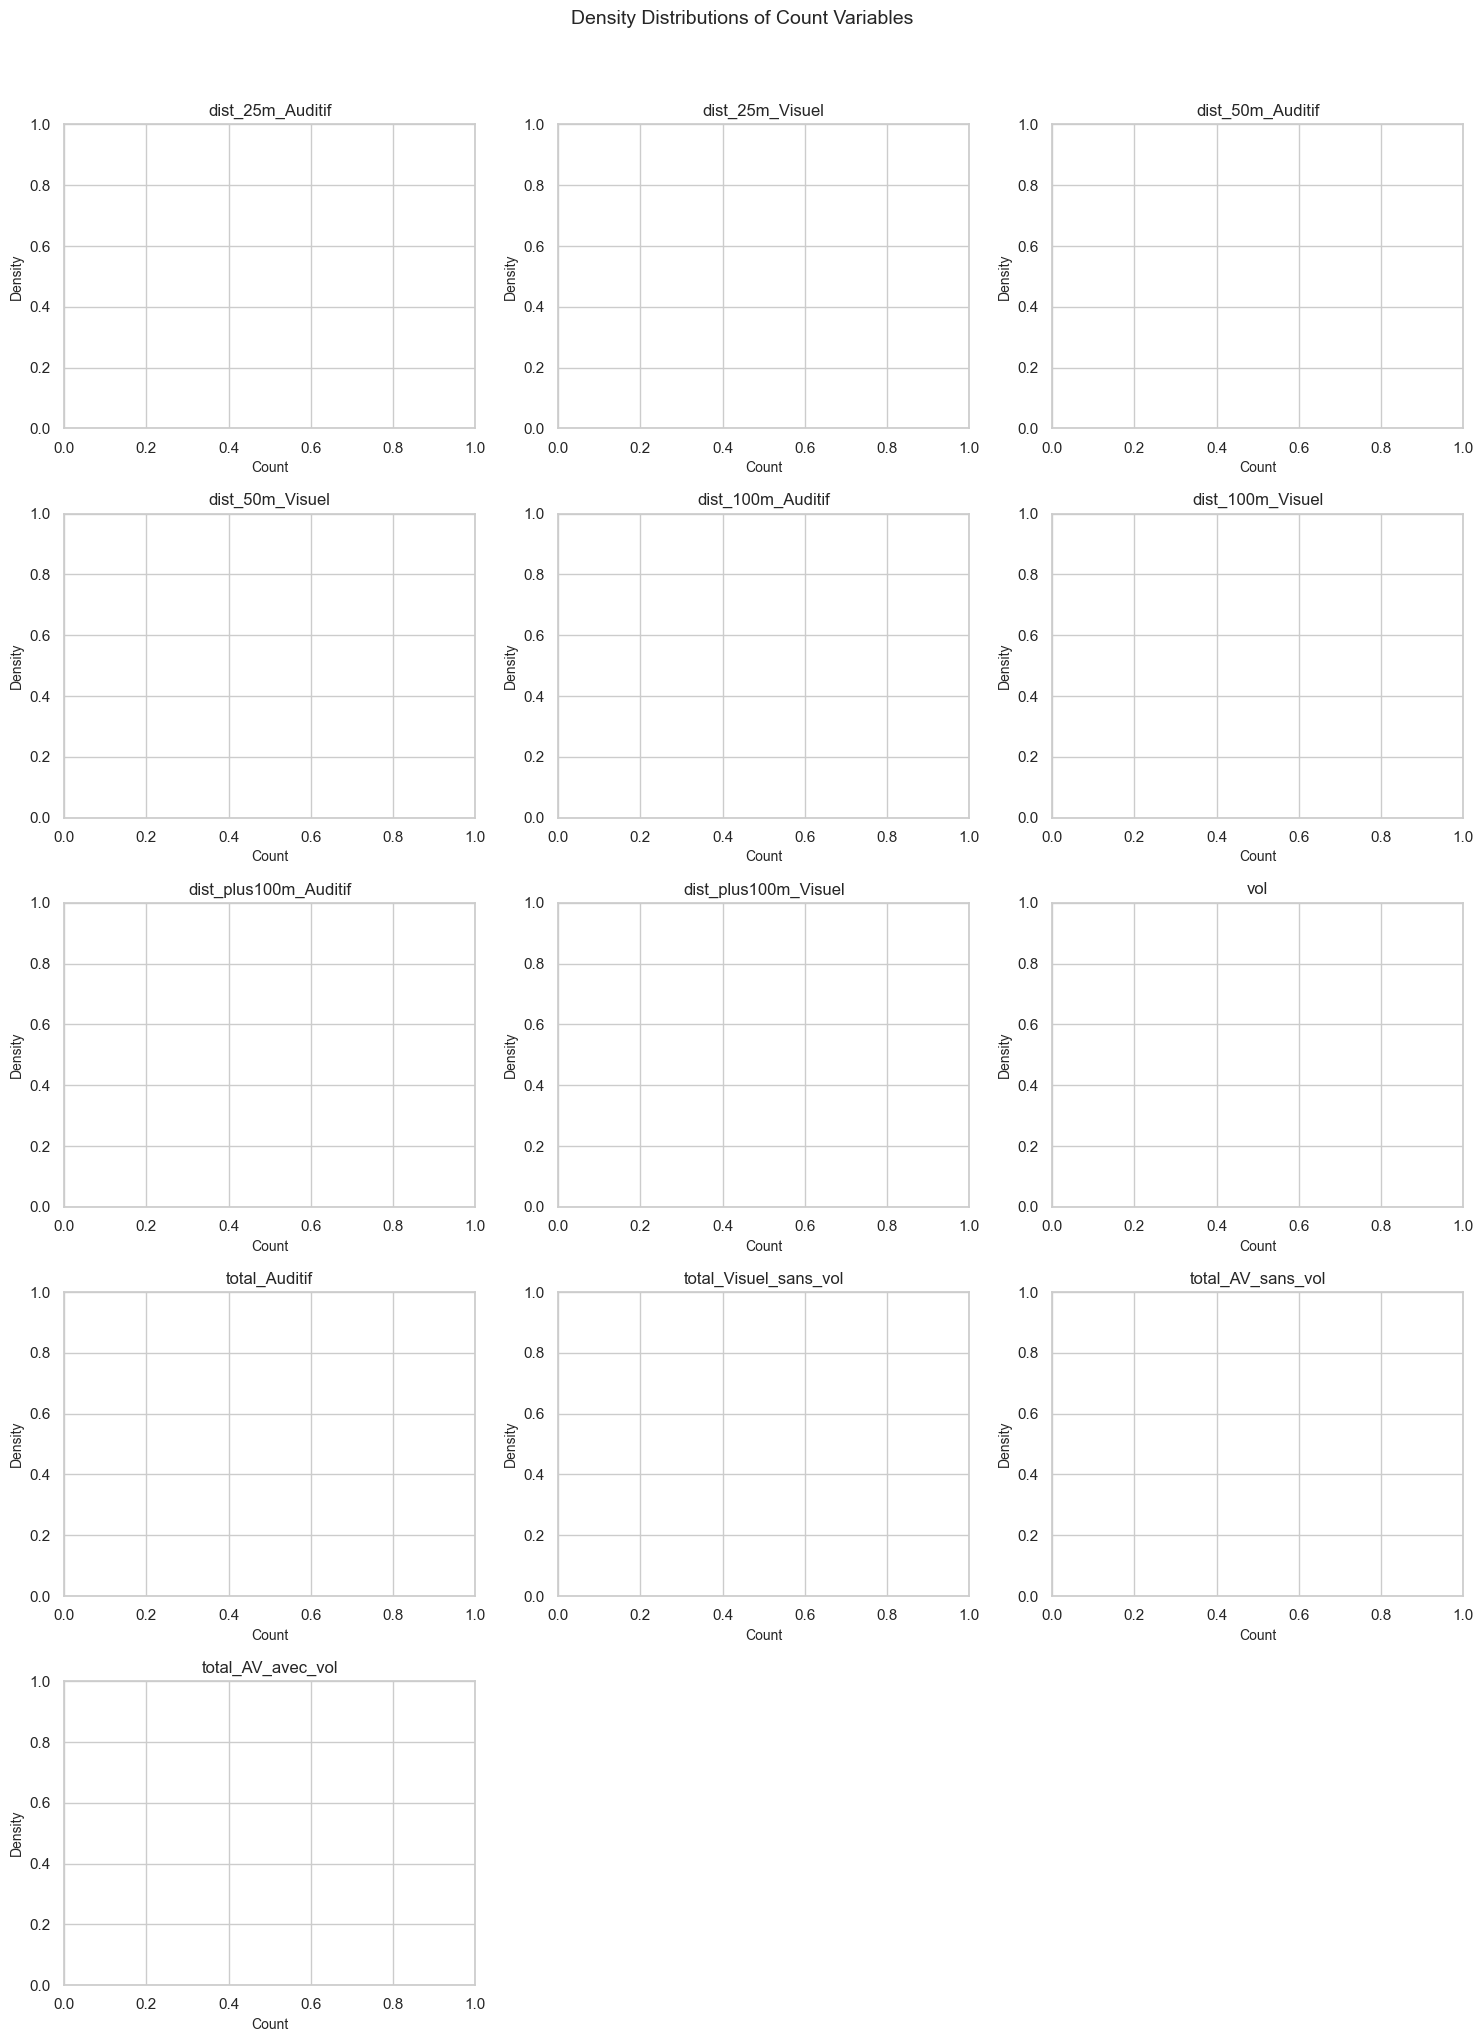

In [ ]:
# %% [markdown]
# ## 各计数指标的密度图（多图布局）  
# ## Density plots for all count variables (grid layout)

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置绘图风格 / Set Seaborn style
sns.set(style="whitegrid")

# 计算网格行列数 / Compute number of rows and columns
n_cols = 3
n_rows = int(np.ceil(len(count_cols) / n_cols))

# 创建子图布局 / Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # 展平索引方便遍历 / Flatten axes for easy indexing

# 遍历所有计数列并绘图 / Loop through count columns and plot KDE
for i, col in enumerate(count_cols):
    sns.kdeplot(
        data=obs_data_no_outliers,
        x=col,
        fill=True,
        color='skyblue',
        alpha=0.6,
        linewidth=1.5,
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Count", fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

# 隐藏空子图（如果列数不是3的倍数）/ Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 全局标题与布局优化 / Adjust layout
plt.suptitle("Density Distributions of Count Variables", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

1️⃣ Observation Effort / 观测努力量
	•	指标定义：每年每条样线或总样线的观测次数（number of observations per year）
	•	选择理由：
	1.	能反映每年的调查活动强度，直接影响计数结果可靠性。
	2.	观测努力量变化会影响物种丰富度和数量的估计，如果不考虑努力量差异，可能误判生物多样性趋势。
	3.	易于量化，并且数据可直接从 obs_data 的 date 列和样线列计算。


2️⃣ Species Richness / 物种丰富度
	•	指标定义：每年被观测到的不同物种数量（unique species per year）
	•	选择理由：
	1.	物种丰富度是生态学常用的多样性指标，能反映生态系统状态和变化。
	2.	随着时间推移，物种数量的变化可以反映长期环境或保护措施的效果。
	3.	对应数据列为 ESPECE，可按年份聚合统计不同物种的数量。


3️⃣ Average Abundance / 平均数量（计数指标）
	•	指标定义：每年每条样线或每点位的平均鸟类数量（例如 total_AV_avec_vol 平均值）
	•	选择理由：
	1.	反映物种总体数量变化趋势，比单纯物种丰富度更能反映个体数量动态。
	2.	可以结合观测努力量进行标准化（如每次观测平均数量），减少不同年份观测差异影响。
	3.	数据列可选择总计列 total_AV_avec_vol 或分距离计数列综合计算。


总结

指标	数据来源	生态学意义	统计意义
Observation Effort / 观测努力量	Nom_transect, date	反映每年的调查活动强度	影响计数可靠性，可作为标准化因子
Species Richness / 物种丰富度	ESPECE	衡量生物多样性	可量化年度多样性变化
Average Abundance / 平均数量	total_AV_avec_vol	反映物种总体数量动态	可标准化、用于趋势分析




,rich,shan,simp,even,D1,D2,low_rich,high_rich,low_shan,high_shan,low_even,high_even,low_D1,high_D1,low_D2,high_D2,cov,low_cov,high_cov
year,,,,,,,,,,,,,,,,,,,
2014,56.930,3.101,0.060,0.768,22.238,16.561,51.000,62.0,3.032,3.161,0.749,0.788,20.748,23.591,15.664,17.486,0.554,0.441,0.662
2015,63.138,3.174,0.056,0.766,23.919,17.843,57.975,68.0,3.121,3.224,0.751,0.783,22.658,25.128,16.996,18.705,0.716,0.605,0.806
2016,69.688,3.209,0.054,0.756,24.761,18.385,62.975,75.0,3.152,3.264,0.741,0.775,23.382,26.149,17.532,19.235,0.797,0.692,0.873
2017,63.619,3.170,0.056,0.764,23.821,17.819,57.000,68.0,3.121,3.222,0.751,0.779,22.662,25.088,17.104,18.568,0.811,0.707,0.884
2018,66.294,3.153,0.058,0.752,23.403,17.324,61.000,71.0,3.103,3.201,0.738,0.767,22.262,24.552,16.684,18.022,0.878,0.785,0.935
2019,63.553,3.146,0.058,0.758,23.247,17.370,58.975,68.0,3.090,3.200,0.744,0.773,21.987,24.541,16.629,18.183,0.865,0.769,0.925
2020,63.868,3.145,0.057,0.757,23.217,17.446,59.000,67.0,3.094,3.197,0.745,0.771,22.057,24.458,16.821,18.173,0.851,0.753,0.915
2021,63.282,3.163,0.056,0.763,23.654,17.728,58.000,68.0,3.118,3.214,0.749,0.778,22.599,24.879,17.095,18.455,0.851,0.753,0.915
2022,62.445,3.157,0.057,0.764,23.506,17.686,57.000,66.0,3.100,3.212,0.749,0.781,22.203,24.836,16.885,18.584,0.851,0.753,0.915


Richness: slope=0.0900/year, p=0.7415
Shannon: slope=0.0005/year, p=0.8238
Evenness: slope=-0.0002/year, p=0.6957
Hill_q1: slope=0.0094/year, p=0.8585
Hill_q2: slope=-0.0014/year, p=0.9712
Coverage: slope=0.0196/year, p=0.0055


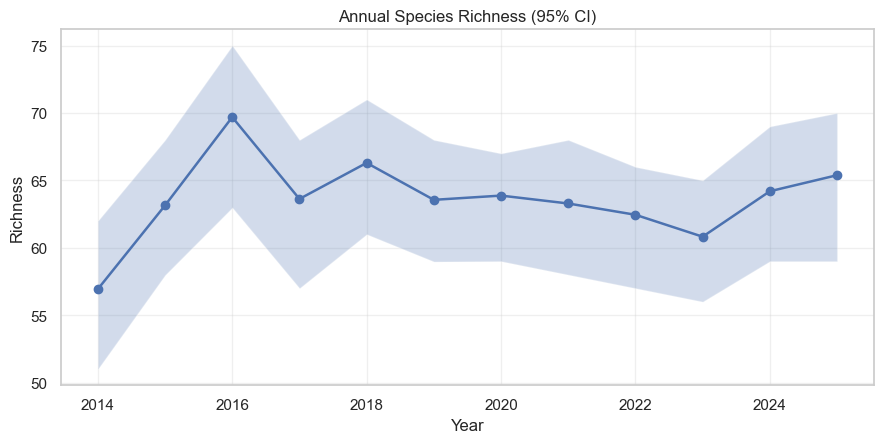

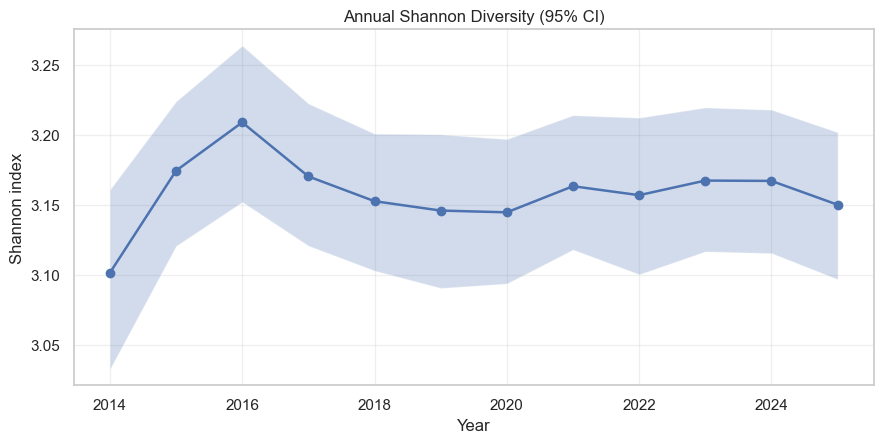

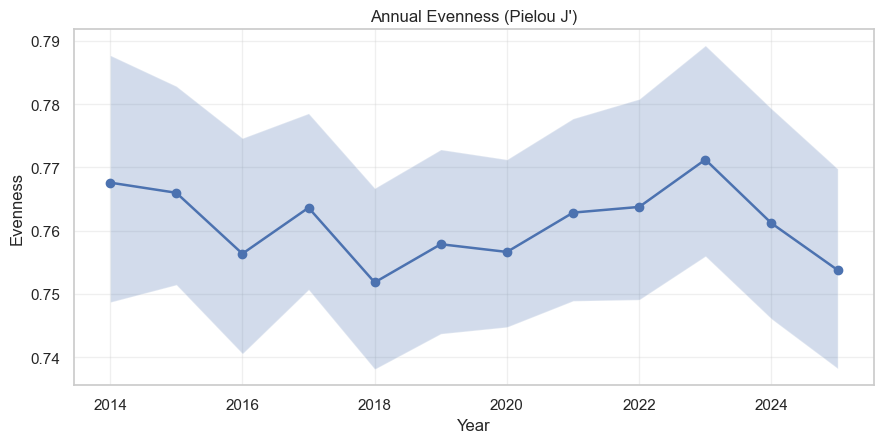

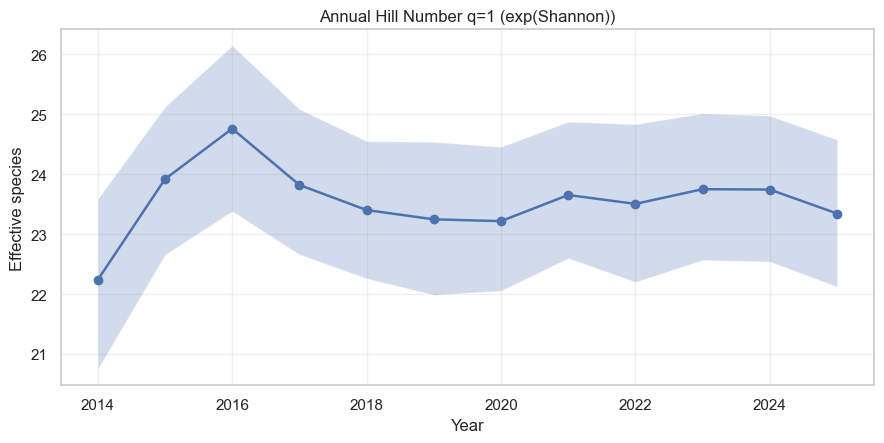

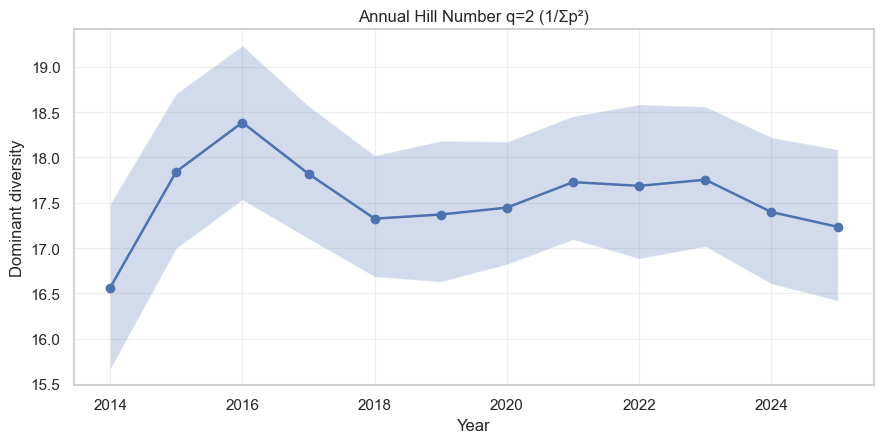

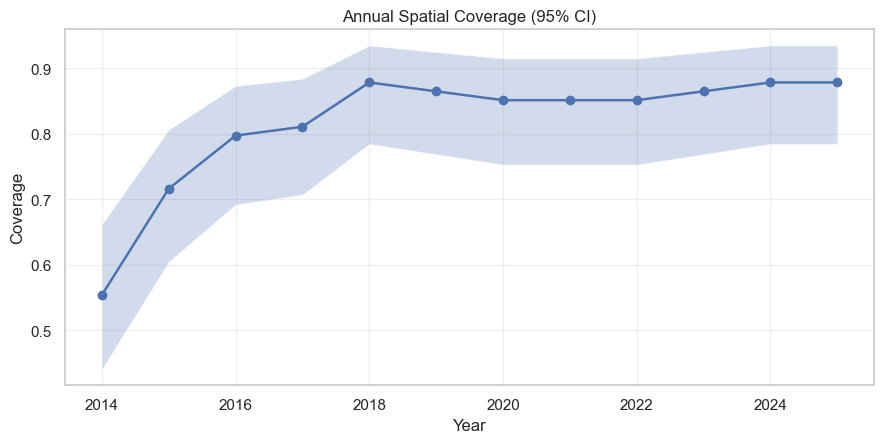

In [ ]:
# === Extended Multi-Year Diversity Indicators (fast bootstrap + Hill numbers + Evenness) ===
# 改进内容：
#   - 在原有 Species_Richness、Shannon_Index、Spatial_Coverage 基础上，
#     新增三个生态学常用扩展指标：
#       (1) Evenness (Pielou's J') = Shannon / ln(Richness)
#       (2) Hill number D1 = exp(Shannon)
#       (3) Hill number D2 = 1 / sum(p_i^2)
#   - 仍基于 fast cluster bootstrap（样线×物种计数矩阵），保持高性能。
#   - 保留 95% CI 与线性趋势分析，输出更全面的表格和可视化。
#
#   列名：ESPECE, Nom_transect, date
#   数据：已预处理版本的 obs_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm

COLS = {"date": "date", "species": "ESPECE", "transect": "Nom_transect"}

# --- 工具函数 ---
def shannon_from_counts(v):
    v = np.asarray(v, dtype=float)
    tot = v.sum()
    if tot <= 0:
        return np.nan
    p = v[v > 0] / tot
    return -np.sum(p * np.log(p))

def simpson_from_counts(v):
    v = np.asarray(v, dtype=float)
    tot = v.sum()
    if tot <= 0:
        return np.nan
    p = v[v > 0] / tot
    return np.sum(p ** 2)

def build_cluster_species_counts(df_year_group, cluster_col, species_col):
    """生成该年样线×物种计数矩阵"""
    if df_year_group.empty:
        return pd.DataFrame(dtype=int), [], []
    g = (
        df_year_group
        .dropna(subset=[cluster_col, species_col])
        .groupby([cluster_col, species_col], observed=True)
        .size()
        .unstack(fill_value=0)
    )
    return g.astype(int), g.index.to_list(), g.columns.to_list()

def fast_bootstrap_diversity_extended(counts_df, B=1000, random_state=42):
    """扩展版簇级自举：同时计算 Richness、Shannon、Simpson、Evenness、Hill numbers"""
    rng = np.random.default_rng(random_state)
    T = counts_df.shape[0]
    if T == 0:
        return {k: np.nan for k in ["rich","shan","simp","even","D1","D2",
                                    "low_rich","high_rich","low_shan","high_shan",
                                    "low_even","high_even","low_D1","high_D1","low_D2","high_D2"]}
    idx = np.arange(T)
    boots = {"rich": [], "shan": [], "simp": [], "even": [], "D1": [], "D2": []}

    def metrics_from_counts(v):
        S = (v > 0).sum()
        H = shannon_from_counts(v)
        P2 = simpson_from_counts(v)
        D1 = np.exp(H) if np.isfinite(H) else np.nan
        D2 = 1.0 / P2 if P2 > 0 else np.nan
        even = H / np.log(S) if S > 1 else np.nan
        return S, H, P2, D1, D2, even

    # 点估计
    v_point = counts_df.sum(axis=0).to_numpy(copy=False)
    S, H, P2, D1, D2, even = metrics_from_counts(v_point)

    # 自举
    for b in range(B):
        sampled = rng.choice(idx, size=T, replace=True)
        v = counts_df.iloc[sampled].sum(axis=0).to_numpy(copy=False)
        S, H, P2, D1, D2, even = metrics_from_counts(v)
        boots["rich"].append(S)
        boots["shan"].append(H)
        boots["simp"].append(P2)
        boots["D1"].append(D1)
        boots["D2"].append(D2)
        boots["even"].append(even)

    def ci(arr): return np.nanpercentile(arr, [2.5, 97.5]) if len(arr) else (np.nan, np.nan)

    result = {
        "rich": np.mean(boots["rich"]),
        "shan": np.mean(boots["shan"]),
        "simp": np.mean(boots["simp"]),
        "even": np.mean(boots["even"]),
        "D1": np.mean(boots["D1"]),
        "D2": np.mean(boots["D2"]),
        "low_rich": ci(boots["rich"])[0], "high_rich": ci(boots["rich"])[1],
        "low_shan": ci(boots["shan"])[0], "high_shan": ci(boots["shan"])[1],
        "low_even": ci(boots["even"])[0], "high_even": ci(boots["even"])[1],
        "low_D1": ci(boots["D1"])[0], "high_D1": ci(boots["D1"])[1],
        "low_D2": ci(boots["D2"])[0], "high_D2": ci(boots["D2"])[1],
    }
    return result

def wilson_ci(k, n, alpha=0.05):
    if n == 0:
        return (np.nan, np.nan)
    z = norm.ppf(1 - alpha/2)
    phat = k / n
    denom = 1 + z**2 / n
    center = (phat + z**2/(2*n)) / denom
    half = (z * np.sqrt(phat*(1-phat)/n + z**2/(4*n**2))) / denom
    return (max(0.0, center - half), min(1.0, center + half))

def linear_trend(y_series):
    y = y_series.dropna()
    if y.empty:
        return {"slope": np.nan, "pvalue": np.nan}
    X = sm.add_constant(y.index.values.astype(float))
    model = sm.OLS(y.values.astype(float), X).fit()
    return {"slope": float(model.params[1]), "pvalue": float(model.pvalues[1])}

# --- 主体计算 ---
YR_MIN, YR_MAX = 2014, 2025
df_raw = obs_data.copy()
df_raw["__date_parsed"] = pd.to_datetime(df_raw[COLS["date"]], errors="coerce")
df_raw["year"] = df_raw["__date_parsed"].dt.year
df_year = df_raw[df_raw["year"].between(YR_MIN, YR_MAX)].copy()

transect_universe = (
    df_year[COLS["transect"]].dropna().drop_duplicates().sort_values().tolist()
)
N_TRANSECTS_UNIVERSE = len(transect_universe)

records = []
for yr in range(YR_MIN, YR_MAX + 1):
    sub = df_year[df_year["year"] == yr]
    counts_df, clusters, species = build_cluster_species_counts(sub, COLS["transect"], COLS["species"])
    res = fast_bootstrap_diversity_extended(counts_df, B=1000, random_state=yr * 19 + 7)
    k, n = len(clusters), N_TRANSECTS_UNIVERSE
    cov_point = (k/n) if n>0 else np.nan
    lo, hi = wilson_ci(k, n)
    res.update({"year": yr, "cov": cov_point, "low_cov": lo, "high_cov": hi})
    records.append(res)

summary_ext = pd.DataFrame(records).set_index("year")
display(summary_ext.round(3))

# --- 趋势打印 ---
for key, label in [("rich","Richness"),("shan","Shannon"),("even","Evenness"),("D1","Hill_q1"),("D2","Hill_q2"),("cov","Coverage")]:
    tr = linear_trend(summary_ext[key])
    print(f"{label}: slope={tr['slope']:.4f}/year, p={tr['pvalue']:.4f}")

# --- 可视化 ---
def plot_indicator(df, col, low, high, title, ylabel):
    plt.figure(figsize=(9,4.6))
    plt.plot(df.index, df[col], marker='o', linewidth=1.8)
    plt.fill_between(df.index, df[low], df[high], alpha=0.25)
    plt.title(title)
    plt.xlabel("Year"); plt.ylabel(ylabel)
    plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

plot_indicator(summary_ext, "rich", "low_rich", "high_rich", "Annual Species Richness (95% CI)", "Richness")
plot_indicator(summary_ext, "shan", "low_shan", "high_shan", "Annual Shannon Diversity (95% CI)", "Shannon index")
plot_indicator(summary_ext, "even", "low_even", "high_even", "Annual Evenness (Pielou J')", "Evenness")
plot_indicator(summary_ext, "D1", "low_D1", "high_D1", "Annual Hill Number q=1 (exp(Shannon))", "Effective species")
plot_indicator(summary_ext, "D2", "low_D2", "high_D2", "Annual Hill Number q=2 (1/Σp²)", "Dominant diversity")
plot_indicator(summary_ext, "cov", "low_cov", "high_cov", "Annual Spatial Coverage (95% CI)", "Coverage")


In [ ]:
# === Auto-interpretation Cell: significance table + bilingual narrative ===
# 功能：
#   1) 从 summary_ext（年度扩展指标表）读取各指标序列；
#   2) 用与前文一致的线性回归估计斜率和 p 值；
#   3) 判定显著性（默认 alpha=0.05，可调）与趋势方向（上升/下降/稳定）；
#   4) 生成英文 + 中文的“结果解读段落”，可直接用于报告；
#   5) 展示一个紧凑的显著性汇总表（指标、斜率、p 值、结论）。

import numpy as np
import pandas as pd
import statsmodels.api as sm
from textwrap import fill

# ------- 0) 基本检查 -------
required_cols = ["rich", "shan", "even", "D1", "D2", "cov"]
if "summary_ext" not in globals():
    raise RuntimeError("未找到变量 summary_ext。请先运行扩展指标计算的 cell，得到 summary_ext 表。")
missing = [c for c in required_cols if c not in summary_ext.columns]
if missing:
    raise RuntimeError(f"summary_ext 缺少必要列: {missing}")

# ------- 1) 工具函数：线性趋势与显著性判别 -------
def linear_trend(y: pd.Series):
    """
    对年度序列做线性回归： y ~ year
    返回 dict: slope, pvalue, intercept, n_years
    """
    y = y.dropna()
    if y.empty:
        return {"slope": np.nan, "pvalue": np.nan, "intercept": np.nan, "n_years": 0}
    X = sm.add_constant(y.index.values.astype(float))
    model = sm.OLS(y.values.astype(float), X).fit()
    slope = float(model.params[1])
    pval = float(model.pvalues[1]) if len(model.pvalues) > 1 else np.nan
    return {"slope": slope, "pvalue": pval, "intercept": float(model.params[0]), "n_years": int(y.shape[0])}

def classify_trend(slope, p, alpha=0.05, small=1e-6):
    """
    根据斜率与 p 值判定趋势：
      - p < alpha: 显著；slope>0 => 上升，slope<0 => 下降（允许 small 阈值避免数值抖动）
      - 否则：稳定（不显著）
    返回: ("up"/"down"/"stable", is_significant: bool)
    """
    if np.isnan(slope) or np.isnan(p):
        return "stable", False
    if p < alpha:
        if slope > small:
            return "up", True
        elif slope < -small:
            return "down", True
        else:
            # p<alpha 但斜率极小，仍视为“稳定”（极不常见；保守处理）
            return "stable", False
    else:
        return "stable", False

# ------- 2) 计算每个指标的趋势与显著性 -------
alpha = 0.05
labels_en = {
    "rich":"Species Richness",
    "shan":"Shannon diversity",
    "even":"Evenness (Pielou's J')",
    "D1":"Hill number q=1 (exp(Shannon))",
    "D2":"Hill number q=2 (1/Σp²)",
    "cov":"Spatial coverage"
}
labels_zh = {
    "rich":"物种丰富度",
    "shan":"香农多样性",
    "even":"群落均匀度（Pielou J′）",
    "D1":"Hill 数 q=1（exp(Shannon)）",
    "D2":"Hill 数 q=2（1/Σp²）",
    "cov":"空间覆盖率"
}

rows = []
for key in required_cols:
    tr = linear_trend(summary_ext[key])
    direction, significant = classify_trend(tr["slope"], tr["pvalue"], alpha=alpha)
    rows.append({
        "indicator": key,
        "name_en": labels_en[key],
        "name_zh": labels_zh[key],
        "slope_per_year": tr["slope"],
        "p_value": tr["pvalue"],
        "significant": significant,
        "direction": direction
    })

sig_df = pd.DataFrame(rows).set_index("indicator")
display(sig_df.loc[:, ["name_en","name_zh","slope_per_year","p_value","significant","direction"]].round(4))

# ------- 3) 自动撰写 英文 + 中文 结果解读段落 -------
def dir_to_text_en(direction):
    return {"up":"increased", "down":"decreased", "stable":"remained stable"}.get(direction,"remained stable")

def dir_to_text_zh(direction):
    return {"up":"上升", "down":"下降", "stable":"稳定"}.get(direction,"稳定")

def fmt_slope(s):
    return f"{s:.4f}"

def fmt_p(p):
    return f"{p:.4f}"

# 英文段落构建
parts_en = []
parts_en.append("Temporal trends in biodiversity indicators (2014–2025):")
stable_en = []
change_en  = []
for key, row in sig_df.iterrows():
    name = row["name_en"]
    slope = fmt_slope(row["slope_per_year"])
    p = fmt_p(row["p_value"])
    if row["significant"]:
        change_en.append(f"{name} {dir_to_text_en(row['direction'])} significantly (slope = {slope} per year, p = {p}).")
    else:
        stable_en.append(f"{name} remained statistically stable (slope = {slope} per year, p = {p}).")

if change_en:
    parts_en.append(" ".join(change_en))
if stable_en:
    parts_en.append(" ".join(stable_en))

# 强调 coverage 与多样性之间的对照（若 coverage 显著）
if sig_df.loc["cov", "significant"]:
    parts_en.append("In contrast to stable diversity metrics, spatial coverage increased significantly, indicating a broader and more representative monitoring network over time.")

# 中文段落构建
parts_zh = []
parts_zh.append("2014–2025 年多样性指标的时间趋势如下：")
stable_zh = []
change_zh = []
for key, row in sig_df.iterrows():
    name = row["name_zh"]
    slope = fmt_slope(row["slope_per_year"])
    p = fmt_p(row["p_value"])
    if row["significant"]:
        change_zh.append(f"{name}{dir_to_text_zh(row['direction'])}，具有统计学显著性（斜率 {slope}/年，p = {p}）。")
    else:
        stable_zh.append(f"{name}整体保持稳定（斜率 {slope}/年，p = {p}）。")

if change_zh:
    parts_zh.append("".join(change_zh))
if stable_zh:
    parts_zh.append("".join(stable_zh))

if sig_df.loc["cov", "significant"]:
    parts_zh.append("与多样性指标的稳定性相对，空间覆盖率显著上升，说明监测网络逐步扩展、代表性增强。")

# 输出段落（自动换行，便于阅读/复制）
print("\n=== Interpretation (EN) ===")
print(fill(" ".join(parts_en), width=100))
print("\n=== 结果解读（中文） ===")
print(fill("".join(parts_zh), width=50))

# ------- 4) 简短的结论建议（可选） -------
conclusion_en = (
    "Overall, the avian community appears ecologically stable across the study period, "
    "with no measurable loss in diversity, while the monitoring design has improved due to increased spatial coverage."
)
conclusion_zh = (
    "总体而言，研究期内鸟类群落表现为生态稳定：多样性未检测到显著下降，"
    "同时空间覆盖率的提升表明监测设计逐步完善、代表性增强。"
)

print("\n=== Conclusion (EN) ===")
print(fill(conclusion_en, width=100))
print("\n=== 结论（中文） ===")
print(fill(conclusion_zh, width=50))


,name_en,name_zh,slope_per_year,p_value,significant,direction
indicator,,,,,,
rich,Species Richness,物种丰富度,0.0900,0.7415,False,stable
shan,Shannon diversity,香农多样性,0.0005,0.8238,False,stable
even,Evenness (Pielou's J'),群落均匀度（Pielou J′）,-0.0002,0.6957,False,stable
D1,Hill number q=1 (exp(Shannon)),Hill 数 q=1（exp(Shannon)）,0.0094,0.8585,False,stable
D2,Hill number q=2 (1/Σp²),Hill 数 q=2（1/Σp²）,-0.0014,0.9712,False,stable
cov,Spatial coverage,空间覆盖率,0.0196,0.0055,True,up



=== Interpretation (EN) ===
Temporal trends in biodiversity indicators (2014–2025): Spatial coverage increased significantly
(slope = 0.0196 per year, p = 0.0055). Species Richness remained statistically stable (slope =
0.0900 per year, p = 0.7415). Shannon diversity remained statistically stable (slope = 0.0005 per
year, p = 0.8238). Evenness (Pielou's J') remained statistically stable (slope = -0.0002 per year, p
= 0.6957). Hill number q=1 (exp(Shannon)) remained statistically stable (slope = 0.0094 per year, p
= 0.8585). Hill number q=2 (1/Σp²) remained statistically stable (slope = -0.0014 per year, p =
0.9712). In contrast to stable diversity metrics, spatial coverage increased significantly,
indicating a broader and more representative monitoring network over time.

=== 结果解读（中文） ===
2014–2025 年多样性指标的时间趋势如下：空间覆盖率上升，具有统计学显著性（斜率
0.0196/年，p = 0.0055）。物种丰富度整体保持稳定（斜率 0.0900/年，p =
0.7415）。香农多样性整体保持稳定（斜率 0.0005/年，p =
0.8238）。群落均匀度（Pielou J′）整体保持稳定（斜率 -0.0002/年，p =
0.6957）。Hill 数 q=1（exp

[Info] No explicit effort column found. Using number of unique survey dates per transect-year as effort.
[Dispersion] Pearson chi2/df = 17.282 → Use Negative Binomial
[Model] Using Negative Binomial (alpha estimated) GLM with offset(log(effort)).


/Users/jinzhuoyuan/King/Saclay/Course/AS/AS_Code/.venv/lib/python3.12/site-packages/statsmodels/base/_prediction_inference.py:782: UserWarning: using default log-link in get_prediction
  warnings.warn("using default log-link in get_prediction")


,rate_pred,rate_ci_low,rate_ci_high
year,,,
2014,68.4576,62.7890,74.6379
2015,80.1862,74.3556,86.4741
2016,94.0440,87.6047,100.9565
2017,77.2340,71.9483,82.9080
2018,74.8019,69.8722,80.0793
2019,76.5846,71.4982,82.0328
2020,86.5511,80.7621,92.7551
2021,84.1589,78.5570,90.1602
2022,86.3149,80.5706,92.4688


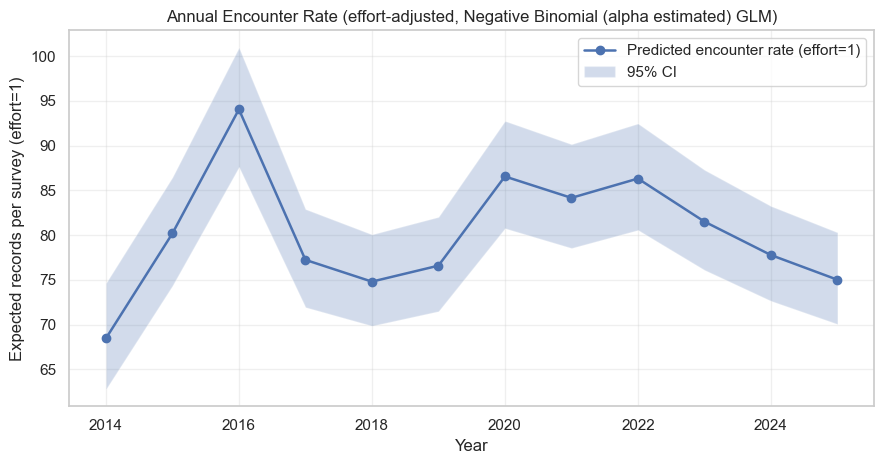

=== Trend on marginal annual means ===
Slope (per year) = 0.1611, p = 0.7918

[Notes]
1) Encounter rate is modeled with offset(log(effort)) for proper effort adjustment.
2) If overdispersion is present (Pearson chi2/df > 1.5), Negative Binomial is used; otherwise Poisson is adequate.
3) Optional covariates (e.g., habitat, weather) are supported and help reduce confounding.


In [ ]:
# === Effort-adjusted Encounter Rate via GLM/NegBin (annual estimates + 95% CI) ===
# 目的（“加固报告”模块）：
#   - 构造“努力校正后的遇见率（encounter rate）”年度指标
#   - 使用 GLM（Poisson；若过度离散则自动切换 Negative Binomial）
#   - 模型： count ~ C(year) + [可选协变量] + offset(log(effort))
#   - 输出 2014–2025 各年的“标准努力(=1)”预测值及 95% CI，并绘图
#
# 兼容性：
#   - 仅依赖 obs_data（已存在的数据表）
#   - 必要列：date, Nom_transect, ESPECE
#   - 可选列：habitat_type, weather_code, 以及任一“effort”数值列（见 CAND_EFFORT_COLS）
#   - 若无显式 effort 列，则回退为：effort = 同一 transect-年 的“独立调查日数”（unique date 数）
#
# 统计解释：
#   - 通过 offset(log(effort)) 在模型内做努力校正，优于先除以 effort 再回归（避免方差扭曲）
#   - 以 transect-year 为分析单元，减少行级相关性
#
# 输出：
#   - annual_encounter（DataFrame）：year, rate_pred, rate_ci_low, rate_ci_high
#   - 过度离散诊断、选择的家族（Poisson or NegBin）
#   - 图：年度预测 + 95% CI

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ---------------- 0) 基本参数与列名 ----------------
YR_MIN, YR_MAX = 2014, 2025
COL_DATE = "date"
COL_TRANSECT = "Nom_transect"
COL_SPECIES = "ESPECE"

# 可能存在的 effort 列候选（如距离/时长/总努力等）
CAND_EFFORT_COLS = [
    "effort_km","effort_h","Effort","effort","distance","duration",
    "km","hours","len_km","time_h","Longueur_km","Duree_h"
]

# ---------------- 1) 构造 transect-year 聚合表：count 与 effort ----------------
df0 = obs_data.copy()
df0["__date_parsed"] = pd.to_datetime(df0[COL_DATE], errors="coerce")
df0["year"] = df0["__date_parsed"].dt.year
df0 = df0[df0["year"].between(YR_MIN, YR_MAX)].copy()

# count：transect-year 的记录条数（每行视为一次记录）
grp_keys = [COL_TRANSECT, "year"]
agg = df0.groupby(grp_keys, dropna=True).size().rename("count").reset_index()

# effort：优先使用显式 effort 列（数值型，transect-year 求和）；否则回退为“独立调查日数”
effort_col_found = None
for c in CAND_EFFORT_COLS:
    if c in df0.columns and pd.api.types.is_numeric_dtype(df0[c]):
        effort_col_found = c
        break

if effort_col_found is not None:
    eff_tbl = (
        df0.groupby(grp_keys, dropna=True)[effort_col_found]
           .sum(min_count=1)
           .rename("effort")
           .reset_index()
    )
    print(f"[Info] Using explicit effort column: {effort_col_found} (summed over transect-year).")
else:
    eff_tbl = (
        df0.dropna(subset=[COL_TRANSECT, "__date_parsed"])
           .groupby(grp_keys)["__date_parsed"]
           .nunique()
           .rename("effort")
           .reset_index()
    )
    print("[Info] No explicit effort column found. Using number of unique survey dates per transect-year as effort.")

ty = pd.merge(agg, eff_tbl, on=grp_keys, how="outer")
# 保护：effort<=0 或缺失 → 设为 1，避免 log(0)
ty["effort"] = ty["effort"].fillna(0)
ty.loc[ty["effort"] <= 0, "effort"] = 1.0

# ---------------- 1.1 可选：加入协变量（如存在） ----------------
# habitat：众数；weather：均值。可按需要替换为你前序清洗的更权威口径。
covars = []
if "habitat_type" in df0.columns:
    mode_hab = (
        df0.dropna(subset=[COL_TRANSECT, "year","habitat_type"])
           .groupby(grp_keys)["habitat_type"]
           .agg(lambda x: x.mode().iat[0] if len(x.mode()) else np.nan)
           .reset_index()
           .rename(columns={"habitat_type":"habitat_type_mode"})
    )
    ty = ty.merge(mode_hab, on=grp_keys, how="left")
    covars.append("C(habitat_type_mode)")

if "weather_code" in df0.columns and pd.api.types.is_numeric_dtype(df0["weather_code"]):
    wmean = (
        df0.dropna(subset=[COL_TRANSECT, "year","weather_code"])
           .groupby(grp_keys)["weather_code"].mean().reset_index()
           .rename(columns={"weather_code":"weather_mean"})
    )
    ty = ty.merge(wmean, on=grp_keys, how="left")
    covars.append("weather_mean")

# ---------------- 2) 模型拟合：Poisson → NegBin（自动过度离散检测） ----------------
rhs_terms = ["C(year)"] + covars
formula = "count ~ " + " + ".join(rhs_terms)

# Poisson
poisson_model = smf.glm(
    formula=formula,
    data=ty,
    family=sm.families.Poisson(),
    offset=np.log(ty["effort"].astype(float))
).fit()

# 过度离散诊断（Pearson χ²/df）
pearson_chi2 = poisson_model.pearson_chi2
df_resid = poisson_model.df_resid
dispersion = pearson_chi2 / df_resid if df_resid > 0 else np.nan
use_negbin = bool(dispersion > 1.5)  # 阈值可根据需要调整

print(f"[Dispersion] Pearson chi2/df = {dispersion:.3f} → "
      f"{'Use Negative Binomial' if use_negbin else 'Poisson seems adequate'}")

if use_negbin:
    # NegativeBinomial 在 statsmodels 中是独立模型，支持 from_formula + offset
    model = sm.NegativeBinomial.from_formula(
        formula=formula,
        data=ty,
        offset=np.log(ty["effort"].astype(float))
    ).fit(disp=0)  # disp=0 可选，避免冗余输出
    family_name = "Negative Binomial (alpha estimated)"
else:
    model = poisson_model
    family_name = "Poisson"

print(f"[Model] Using {family_name} GLM with offset(log(effort)).")

# ---------------- 3) 年度边际均值（effort=1）预测 + 95% CI ----------------
pred_df = pd.DataFrame({"year": list(range(YR_MIN, YR_MAX+1))})
pred_df["effort"] = 1.0  # 标准努力：每年“单次调查”的期望记录数

# 协变量取参考值（habitat 取众数，weather 取均值）
if "habitat_type_mode" in ty.columns:
    ref_hab = ty["habitat_type_mode"].mode().iat[0] if ty["habitat_type_mode"].notna().any() else None
    pred_df["habitat_type_mode"] = ref_hab
if "weather_mean" in ty.columns:
    pred_df["weather_mean"] = ty["weather_mean"].mean()

# --- 替换从 pred_res 开始的代码 ---
pred_res = model.get_prediction(pred_df.assign(offset=np.log(pred_df["effort"])))
pred_summary = pred_res.summary_frame(alpha=0.05)

# 使用通用列名（兼容 Poisson GLM 和 Negative Binomial）
annual_encounter = pd.DataFrame({
    "year": pred_df["year"].values,
    "rate_pred": pred_summary["predicted"].values,
    "rate_ci_low": pred_summary["ci_lower"].values,
    "rate_ci_high": pred_summary["ci_upper"].values
}).set_index("year")

display(annual_encounter.round(4))

# ---------------- 4) 可视化：年度预测 + 95% CI ----------------
plt.figure(figsize=(9,4.8))
plt.plot(annual_encounter.index, annual_encounter["rate_pred"], marker="o", linewidth=1.8,
         label="Predicted encounter rate (effort=1)")
plt.fill_between(annual_encounter.index,
                 annual_encounter["rate_ci_low"],
                 annual_encounter["rate_ci_high"],
                 alpha=0.25, label="95% CI")
plt.title(f"Annual Encounter Rate (effort-adjusted, {family_name} GLM)")
plt.xlabel("Year"); plt.ylabel("Expected records per survey (effort=1)")
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# ---------------- 5) 年度边际均值的线性趋势（仅作量化参考） ----------------
lin_X = sm.add_constant(annual_encounter.index.values.astype(float))
lin_mod = sm.OLS(annual_encounter["rate_pred"].values.astype(float), lin_X).fit()
print("=== Trend on marginal annual means ===")
print(f"Slope (per year) = {lin_mod.params[1]:.4f}, p = {lin_mod.pvalues[1]:.4f}")

print("\n[Notes]")
print("1) Encounter rate is modeled with offset(log(effort)) for proper effort adjustment.")
print("2) If overdispersion is present (Pearson chi2/df > 1.5), Negative Binomial is used; otherwise Poisson is adequate.")
print("3) Optional covariates (e.g., habitat, weather) are supported and help reduce confounding.")


# The effort-adjusted encounter rate exhibited substantial year-to-year variability, with a clear non-linear pattern rather than a monotonic trend. Encounter rates increased sharply from 2014 to 2016, peaked around 2016, and subsequently declined and stabilized after 2018.
# A simple linear trend (slope = 0.16/year, p = 0.79) was not significant, suggesting that the variation is better described by a short-term fluctuation rather than a sustained increase or decrease.
# This pattern likely reflects variations in survey effort efficiency, weather, or local population dynamics rather than directional ecological change.)


In [ ]:
# ! pip install pygam

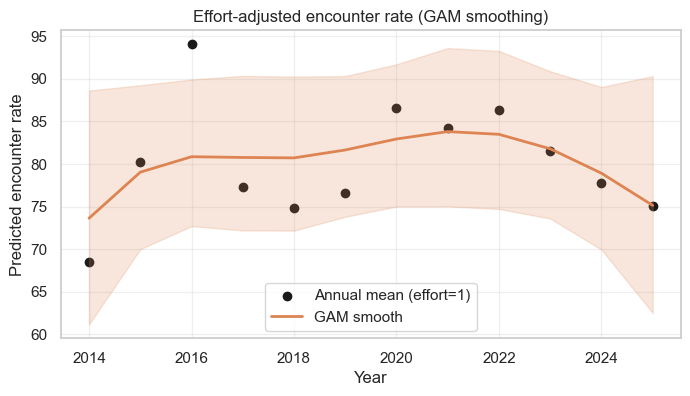

In [ ]:
from pygam import PoissonGAM, s

X = annual_encounter.index.values.reshape(-1, 1)
y = annual_encounter['rate_pred'].values
gam = PoissonGAM(s(0, n_splines=6)).fit(X, y)

plt.figure(figsize=(8,4))
plt.scatter(X, y, color='k', label='Annual mean (effort=1)')
plt.plot(X, gam.predict(X), color='C1', linewidth=2, label='GAM smooth')
plt.fill_between(X.flatten(),
                 gam.confidence_intervals(X)[:,0],
                 gam.confidence_intervals(X)[:,1],
                 color='C1', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Predicted encounter rate')
plt.title('Effort-adjusted encounter rate (GAM smoothing)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# The effort-adjusted encounter rate displayed a distinct non-linear temporal pattern between 2014 and 2025.
# Encounter rates increased sharply in the early years (2014–2016), plateaued during 2017–2021, and showed a slight decline afterwards.
# The GAM smoothing highlights this “rise–stabilization–decline” trajectory, with broad confidence intervals in recent years indicating higher uncertainty.
# This suggests that while survey efficiency and spatial coverage initially improved, ecological or operational factors may have contributed to a mild reduction in observed encounter rates in the most recent period.

In [ ]:
# # %% [markdown]
# # ## 年度物种数量变化趋势 / Annual Species Abundance Over Time
# # 计算每个物种（ESPECE）在每年（year）的观测数量，并可视化趋势。
# 
# # %%
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # 确保日期列已转换为 datetime 类型 / Ensure date is datetime
# obs_data_winsor['date'] = pd.to_datetime(obs_data_winsor['date'], errors='coerce')
# obs_data_winsor['year'] = obs_data_winsor['date'].dt.year
# 
# # 选择总计列作为观测数量 / Choose total count column for abundance
# count_col = 'total_AV_avec_vol'  # 包含听觉+视觉+飞行观测总数的列
# 
# # 按年份和物种分组求和 / Group by year and species to get total counts
# species_yearly = (
#     obs_data_winsor
#     .groupby(['year', 'ESPECE'])[count_col]
#     .sum()
#     .reset_index()
# )
# 
# # 检查结果 / Preview
# display(species_yearly.head())
# 
# # %% [markdown]
# # ## 可视化年度趋势（按物种分组）
# # 使用线图展示不同物种随年份变化的观测数量
# 
# # %%
# plt.figure(figsize=(12, 7))
# sns.lineplot(
#     data=species_yearly,
#     x='year',
#     y=count_col,
#     hue='ESPECE',
#     lw=2,
#     alpha=0.8
# )
# 
# plt.title("Annual Bird Species Abundance (2014–2025)", fontsize=16)
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Total Count (Auditory + Visual + Flight)", fontsize=12)
# plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

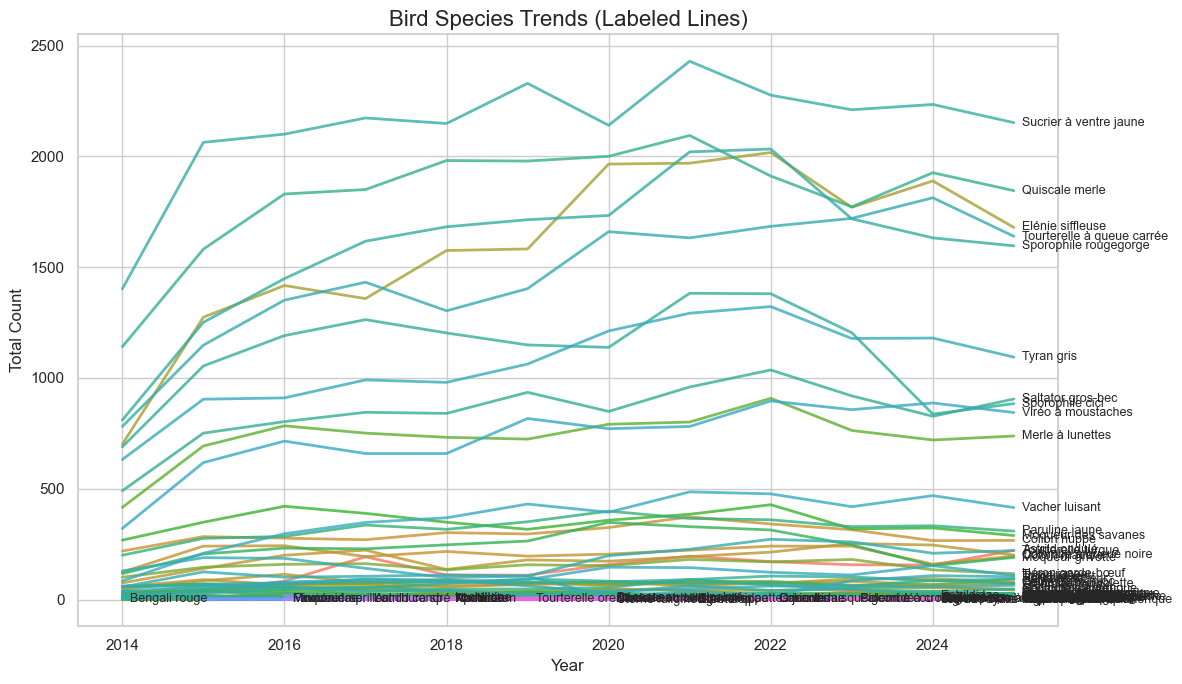

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=species_yearly,
    x='year',
    y=count_col,
    hue='ESPECE',
    lw=2,
    alpha=0.8,
    legend=False  # 关闭图例
)

# 在每条线末尾添加文字标签 / Label each line end
for species in species_yearly['ESPECE'].unique():
    subset = species_yearly[species_yearly['ESPECE'] == species]
    last_year = subset['year'].max()
    last_value = subset.loc[subset['year'] == last_year, count_col].values[0]
    plt.text(last_year + 0.1, last_value, species, fontsize=9, va='center')

plt.title("Bird Species Trends (Labeled Lines)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()

In [ ]:
# 计算每种鸟类的观测总数
species_counts = obs_data_winsor.groupby('ESPECE')['total_AV_avec_vol'].sum().sort_values(ascending=False)

# 取前10种最常见鸟
print(species_counts.head(10))


ESPECE
Quiscale merle                35429.666667
Sucrier à ventre jaune        29593.000000
Elénie siffleuse              20224.000000
Sporophile rougegorge         19812.666667
Tourterelle à queue carrée    19567.000000
Sporophile cici               14209.000000
Tyran gris                    13269.666667
Saltator gros-bec             10352.000000
Viréo à moustaches             9201.000000
Merle à lunettes               9066.000000
Name: total_AV_avec_vol, dtype: float64


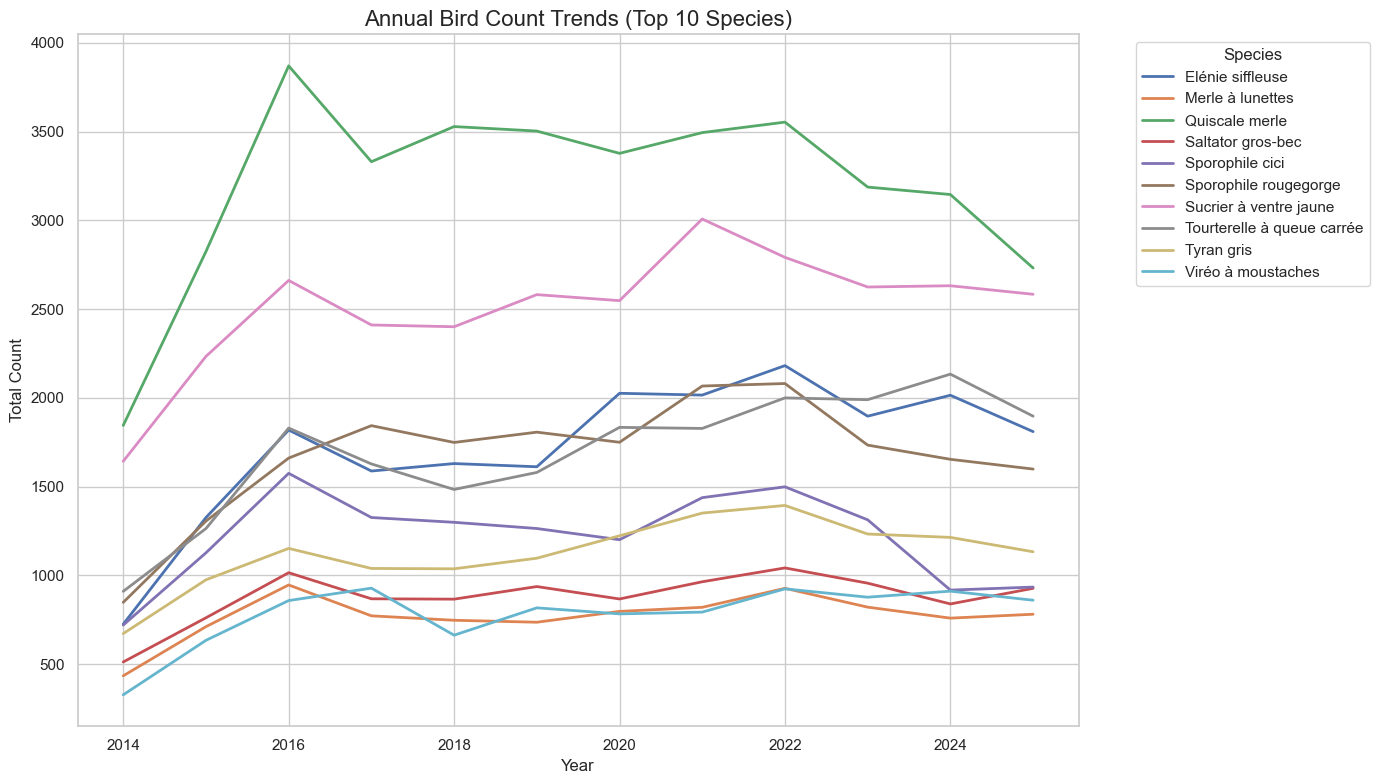

In [ ]:
# %% [markdown]
# ## 年尺度鸟类数量变化折线图（使用清洗后的数据 obs_data_cleaned）
# ## Annual Bird Count Trends (based on cleaned dataset)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set Seaborn style
sns.set(style="whitegrid")

# 十种高丰度鸟类 / Top 10 most abundant species
top10_species = [
    "Sucrier à ventre jaune",
    "Quiscale merle",
    "Sporophile rougegorge",
    "Elénie siffleuse",
    "Tourterelle à queue carrée",
    "Sporophile cici",
    "Tyran gris",
    "Saltator gros-bec",
    "Viréo à moustaches",
    "Merle à lunettes"
]

# 确保日期为 datetime 格式 / Ensure date is datetime
obs_data_cleaned['date'] = pd.to_datetime(obs_data_cleaned['date'], errors='coerce')

# 提取年份 / Extract year
obs_data_cleaned['year'] = obs_data_cleaned['date'].dt.year

# 仅保留十种目标鸟类 / Filter top 10 species
top10_data = obs_data_cleaned[obs_data_cleaned['ESPECE'].isin(top10_species)]

# 按年份和物种汇总年度总数量 / Group by year and species, sum counts
annual_counts = (
    top10_data.groupby(['year', 'ESPECE'])['total_AV_avec_vol']
    .sum()
    .reset_index()
)

# %% [markdown]
# ### 绘制年度数量变化折线图  
# ### Plot annual count trends for top 10 bird species

# %%
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=annual_counts,
    x='year',
    y='total_AV_avec_vol',
    hue='ESPECE',
    linewidth=2
)

plt.title("Annual Bird Count Trends (Top 10 Species)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.legend(
    title="Species",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

In [ ]:
unique_months = obs_data_cleaned["month"].unique()
unique_months

array([4, 5, 6, 3, 7], dtype=int32)

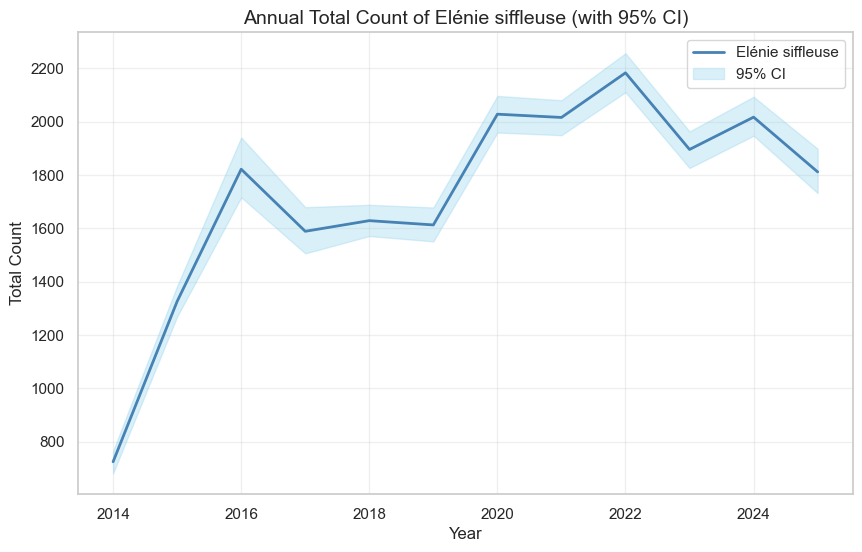

In [ ]:
# %% [markdown]
# ## 年尺度 Elénie siffleuse 总数量变化趋势（使用 total_AV_avec_vol）
# ## Annual Total Count Trend of Elénie siffleuse

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set style
sns.set(style="whitegrid")

# 选择目标物种 / Target species
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 按年份汇总总数量 / Aggregate total counts by year
annual_counts = data_species.groupby("year")["total_AV_avec_vol"].sum().reset_index()

# 定义 Bootstrap 函数计算总数置信区间
def bootstrap_ci_total(values, n_boot=1000, ci=95):
    totals = []
    values = np.array(values)
    for _ in range(n_boot):
        sample = np.random.choice(values, size=len(values), replace=True)
        totals.append(np.sum(sample))
    lower = np.percentile(totals, (100 - ci) / 2)
    upper = np.percentile(totals, 100 - (100 - ci) / 2)
    return np.mean(totals), lower, upper

# 计算每年的总数均值和置信区间
results = []
for year, group in data_species.groupby("year"):
    counts = group["total_AV_avec_vol"].values
    mean_total, lower, upper = bootstrap_ci_total(counts)
    results.append({"year": year, "mean_total": mean_total, "lower": lower, "upper": upper})

df_ci = pd.DataFrame(results)

# %% [markdown]
# ### 绘制年度总计数折线图及置信区间

# %%
plt.figure(figsize=(10,6))
plt.plot(df_ci["year"], df_ci["mean_total"], color="steelblue", linewidth=2, label=species)
plt.fill_between(df_ci["year"], df_ci["lower"], df_ci["upper"], alpha=0.3, color="skyblue", label="95% CI")
plt.title(f"Annual Total Count of {species} (with 95% CI)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

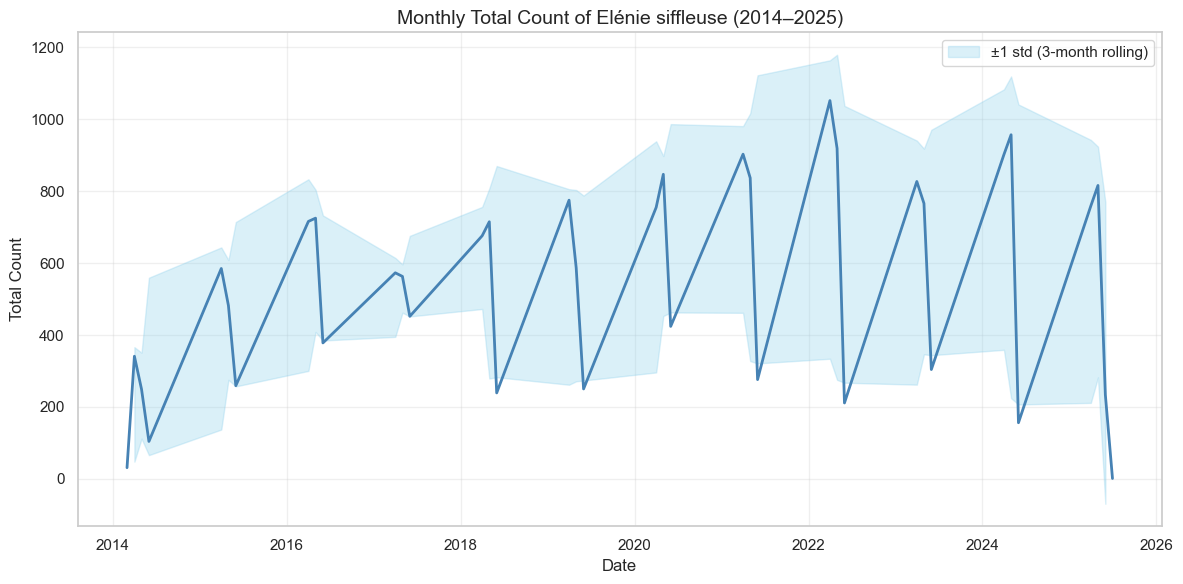

In [ ]:
# %% [markdown]
# ## 月尺度 Elénie siffleuse 数量变化趋势（使用现有 year 和 month 列）
# ## Monthly Total Count Trend of Elénie siffleuse (using existing year and month columns)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set style
sns.set(style="whitegrid")

# 选择目标物种 / Target species
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 按年和月聚合总数 / Aggregate total counts by year and month
monthly_counts = (
    data_species.groupby(["year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 按时间顺序创建年月序列 / Create time index
monthly_counts["year_month"] = pd.to_datetime(
    monthly_counts["year"].astype(str) + "-" + monthly_counts["month"].astype(str) + "-01"
)

# %% [markdown]
# ### 绘制月尺度总数折线图 / Plot monthly total count trend

# %%
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_counts,
    x="year_month",
    y="total_AV_avec_vol",
    color="steelblue",
    linewidth=2
)
plt.fill_between(
    monthly_counts["year_month"],
    monthly_counts["total_AV_avec_vol"].rolling(3, center=True).mean() - monthly_counts["total_AV_avec_vol"].rolling(3, center=True).std(),
    monthly_counts["total_AV_avec_vol"].rolling(3, center=True).mean() + monthly_counts["total_AV_avec_vol"].rolling(3, center=True).std(),
    color="skyblue",
    alpha=0.3,
    label="±1 std (3-month rolling)"
)
plt.title(f"Monthly Total Count of {species} (2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

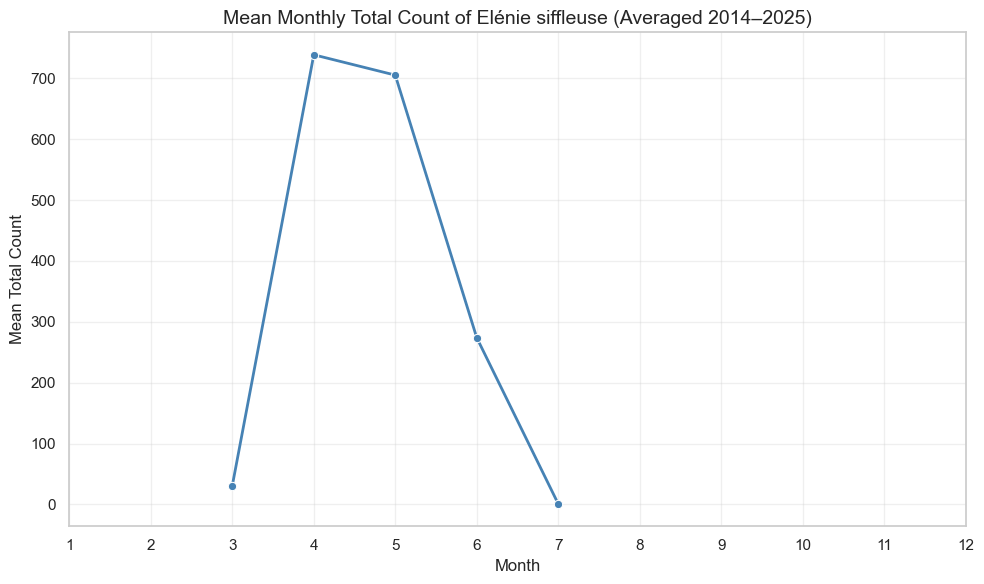

In [ ]:
# %% [markdown]
# ## 平均月尺度 Elénie siffleuse 数量变化（2014–2025 平均）
# ## Mean Monthly Total Count of Elénie siffleuse (averaged across 2014–2025)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 选择目标物种
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 按年份和月份聚合总数
monthly_sum = (
    data_species.groupby(["year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 按月取平均值（跨年平均）
mean_monthly = (
    monthly_sum.groupby("month")["total_AV_avec_vol"]
    .mean()
    .reset_index()
)

# %% [markdown]
# ### 绘制平均月尺度折线图

# %%
plt.figure(figsize=(10,6))
sns.lineplot(
    data=mean_monthly,
    x="month",
    y="total_AV_avec_vol",
    marker="o",
    color="steelblue",
    linewidth=2
)
plt.title(f"Mean Monthly Total Count of {species} (Averaged 2014–2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Total Count", fontsize=12)
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/Users/jinzhuoyuan/King/Saclay/Course/AS/AS_Code/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jinzhuoyuan/King/Saclay/Course/AS/AS_Code/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


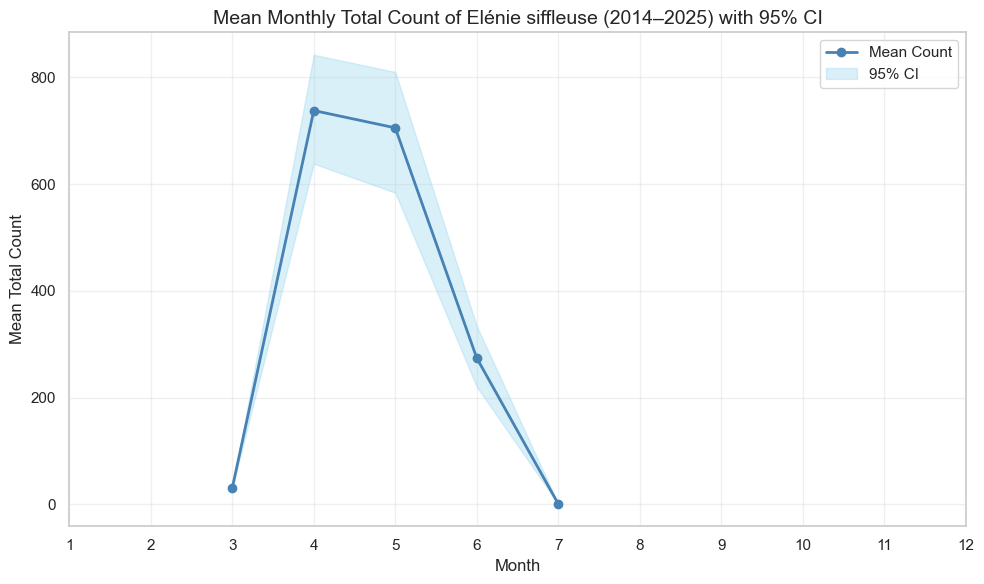

In [ ]:
# %% [markdown]
# ## 平均月尺度 Elénie siffleuse 数量变化及置信区间（2014–2025）
# ## Mean Monthly Total Count with 95% CI

# %%
import numpy as np

# 定义 Bootstrap 函数 / bootstrap function
def bootstrap_ci(values, n_boot=1000, ci=95):
    """返回均值及置信区间"""
    values = np.array(values)
    means = []
    for _ in range(n_boot):
        sample = np.random.choice(values, size=len(values), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(means), lower, upper

# 按月计算均值和置信区间
monthly_results = []
for month in range(1, 13):
    # 取每个月所有年份的数据
    counts = monthly_sum[monthly_sum["month"] == month]["total_AV_avec_vol"].values
    mean, lower, upper = bootstrap_ci(counts)
    monthly_results.append({"month": month, "mean": mean, "lower": lower, "upper": upper})

df_monthly_ci = pd.DataFrame(monthly_results)

# %% [markdown]
# ### 绘制带 95% 置信区间的月均折线图

# %%
plt.figure(figsize=(10,6))
plt.plot(df_monthly_ci["month"], df_monthly_ci["mean"], color="steelblue", linewidth=2, marker="o", label="Mean Count")
plt.fill_between(df_monthly_ci["month"], df_monthly_ci["lower"], df_monthly_ci["upper"], color="skyblue", alpha=0.3, label="95% CI")
plt.title(f"Mean Monthly Total Count of {species} (2014–2025) with 95% CI", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Total Count", fontsize=12)
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

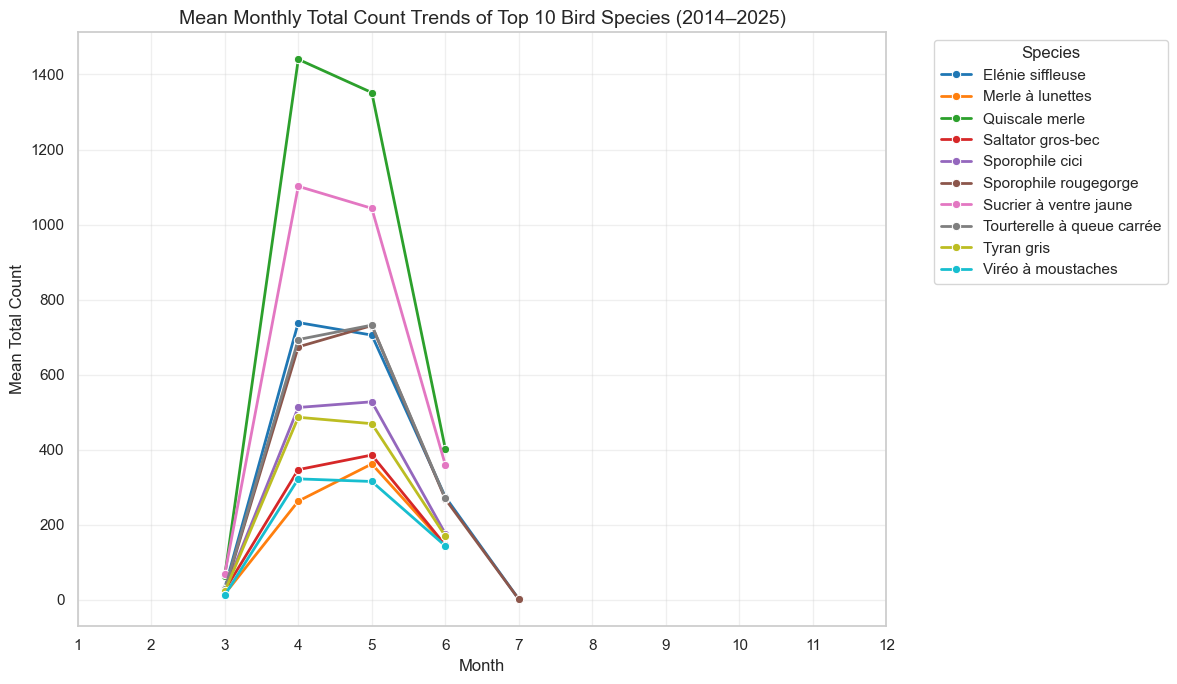

In [ ]:
# %% [markdown]
# ## 平均月尺度数量 Top10 鸟类数量变化趋势
# ## Mean Monthly Total Count Trends of Top 10 Most Abundant Species (2014–2025)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 计算每个物种的总观测量（2014–2025 全部）
species_total = (
    obs_data_cleaned.groupby("ESPECE")["total_AV_avec_vol"]
    .sum()
    .sort_values(ascending=False)
)

# 选择前10个物种
top10_species = species_total.head(10).index.tolist()

# 筛选出这10个物种的数据
top10_data = obs_data_cleaned[obs_data_cleaned["ESPECE"].isin(top10_species)].copy()

# 按年份、月份、物种汇总每月总计数
monthly_counts = (
    top10_data.groupby(["ESPECE", "year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 计算跨年平均（月尺度）
mean_monthly_counts = (
    monthly_counts.groupby(["ESPECE", "month"])["total_AV_avec_vol"]
    .mean()
    .reset_index()
)

# %% [markdown]
# ### 绘制折线图（每个物种一条线）

# %%
plt.figure(figsize=(12,7))
sns.lineplot(
    data=mean_monthly_counts,
    x="month",
    y="total_AV_avec_vol",
    hue="ESPECE",
    marker="o",
    linewidth=2,
    palette="tab10"
)
plt.title("Mean Monthly Total Count Trends of Top 10 Bird Species (2014–2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Total Count", fontsize=12)
plt.xticks(range(1,13))
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Top 10 species: ['Quiscale merle', 'Sucrier à ventre jaune', 'Elénie siffleuse', 'Tourterelle à queue carrée', 'Sporophile rougegorge', 'Sporophile cici', 'Tyran gris', 'Saltator gros-bec', 'Viréo à moustaches', 'Merle à lunettes']


/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/3646147177.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_species_top10["date"] = pd.to_datetime(


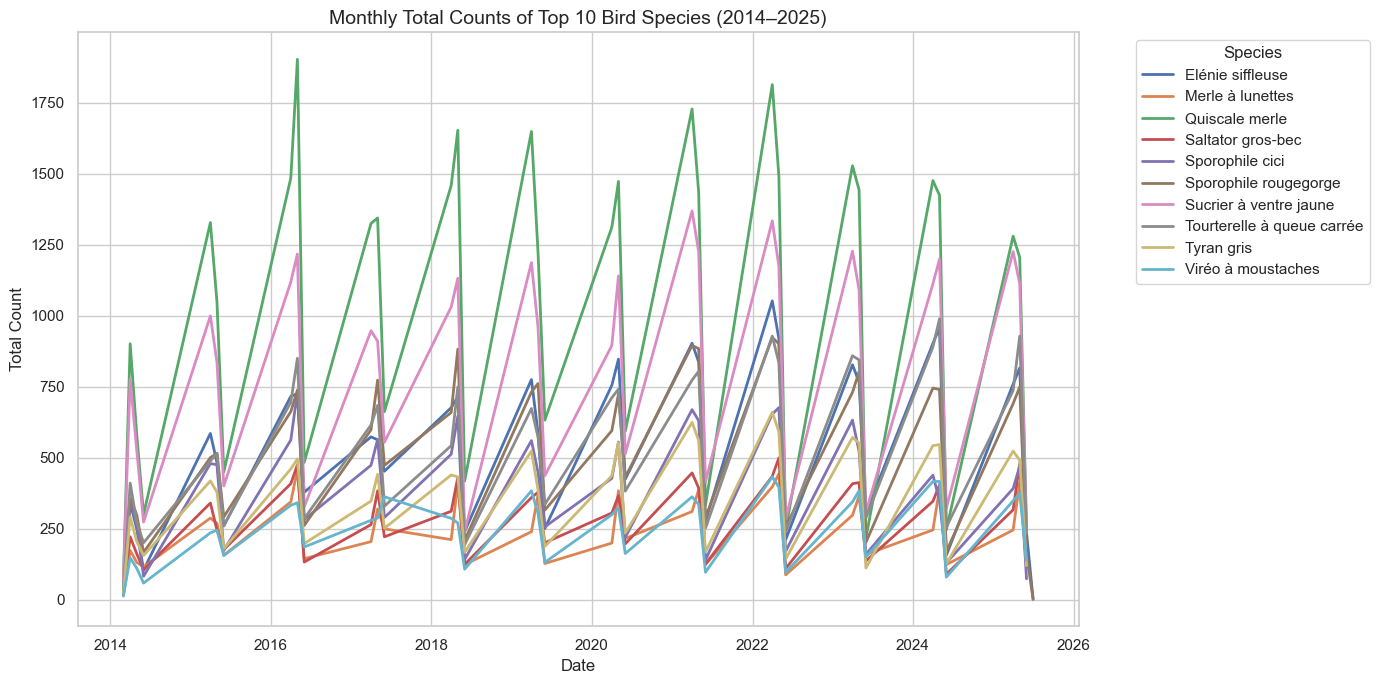

In [ ]:
# %% [markdown]
# ## 2014–2025 年 Top 10 鸟类的月尺度数量变化趋势
# ## Monthly Total Count Trends for Top 10 Bird Species (2014–2025)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# === 1. 计算每个物种的总数量（用于筛选 Top 10） ===
species_total = (
    obs_data_cleaned.groupby("ESPECE")["total_AV_avec_vol"]
    .sum()
    .sort_values(ascending=False)
)
top10_species = species_total.head(10).index.tolist()

print("Top 10 species:", top10_species)

# === 2. 计算月尺度总数量（按物种、年份、月份汇总） ===
monthly_species = (
    obs_data_cleaned.groupby(["ESPECE", "year", "month"])["total_AV_avec_vol"]
    .sum()
    .reset_index()
)

# 仅保留 Top 10 物种
monthly_species_top10 = monthly_species[monthly_species["ESPECE"].isin(top10_species)]

# === 3. 创建日期列（方便排序和绘图） ===
monthly_species_top10["date"] = pd.to_datetime(
    monthly_species_top10["year"].astype(str)
    + "-"
    + monthly_species_top10["month"].astype(str)
    + "-01"
)

# === 4. 绘图 ===
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_species_top10,
    x="date",
    y="total_AV_avec_vol",
    hue="ESPECE",
    linewidth=2
)

plt.title("Monthly Total Counts of Top 10 Bird Species (2014–2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

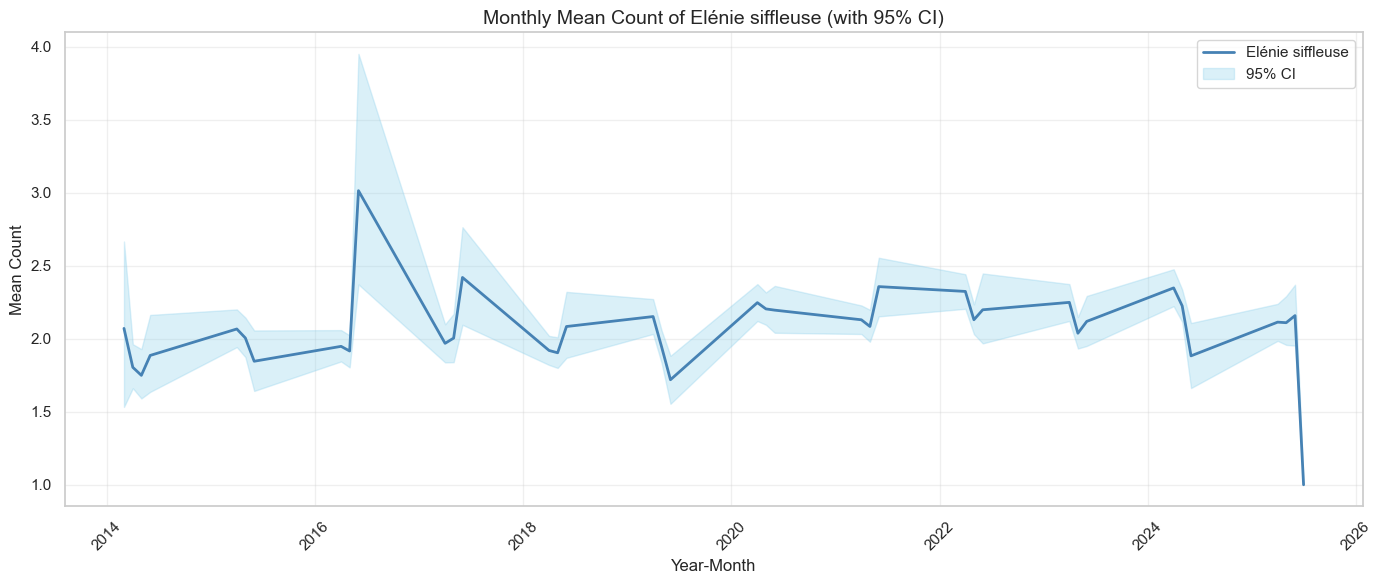

In [ ]:
# %% [markdown]
# ## 月尺度 Elénie siffleuse 数量变化趋势
# ## Monthly Count Trend of Elénie siffleuse

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格 / Set Seaborn style
sns.set(style="whitegrid")

# 选择目标物种 / Target species
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# 创建年月列 / Create year-month column
data_species['year_month'] = pd.to_datetime(data_species['year'].astype(str) + '-' + data_species['month'].astype(str).str.zfill(2))

# 按年月汇总总计数 / Aggregate total counts by year-month
monthly_counts = data_species.groupby('year_month')['total_AV_avec_vol'].agg(list).reset_index()

# Bootstrap 函数计算均值和95%置信区间 / Compute mean and 95% CI via bootstrap
def bootstrap_ci(values, n_boot=1000, ci=95):
    means = []
    values = np.array(values)
    for _ in range(n_boot):
        sample = np.random.choice(values, size=len(values), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(means), lower, upper

# 计算均值和置信区间 / Compute mean and CI
results = []
for _, row in monthly_counts.iterrows():
    counts = row['total_AV_avec_vol']
    if len(counts) > 0:
        mean, lower, upper = bootstrap_ci(counts)
        results.append({
            "year_month": row['year_month'],
            "mean": mean,
            "lower": lower,
            "upper": upper
        })

df_monthly_ci = pd.DataFrame(results)

# %% [markdown]
# ### 绘制月度折线图及置信区间 / Plot monthly trends with 95% CI

# %%
plt.figure(figsize=(14,6))
plt.plot(df_monthly_ci['year_month'], df_monthly_ci['mean'], color='steelblue', linewidth=2, label=species)
plt.fill_between(df_monthly_ci['year_month'], df_monthly_ci['lower'], df_monthly_ci['upper'], alpha=0.3, color='skyblue', label='95% CI')
plt.title(f"Monthly Mean Count of {species} (with 95% CI)", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Mean Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 转数值类型
obs_data_cleaned[['nuages','pluie','vent','visibilite']] = obs_data_cleaned[['nuages','pluie','vent','visibilite']].apply(pd.to_numeric, errors='coerce')

# 按年和风力聚合 Elénie siffleuse 数量
species = "Elénie siffleuse"
data_species = obs_data_cleaned[obs_data_cleaned['ESPECE'] == species]

agg_data = data_species.groupby(['year','vent'])['total_AV_avec_vol'].mean().reset_index()

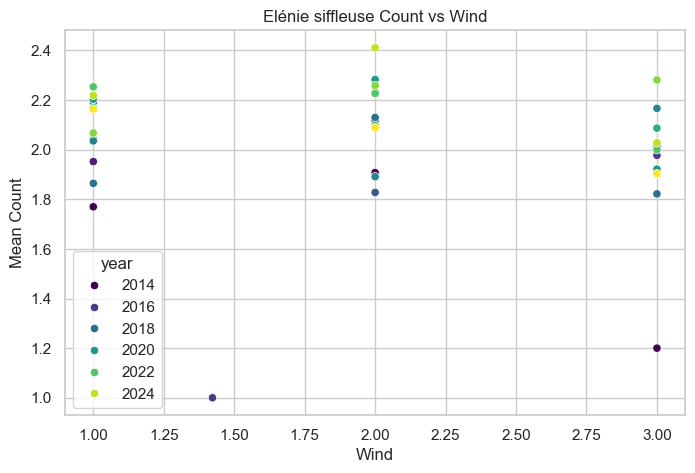

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=agg_data, x='vent', y='total_AV_avec_vol', hue='year', palette='viridis')
plt.xlabel("Wind")
plt.ylabel("Mean Count")
plt.title("Elénie siffleuse Count vs Wind")
plt.show()

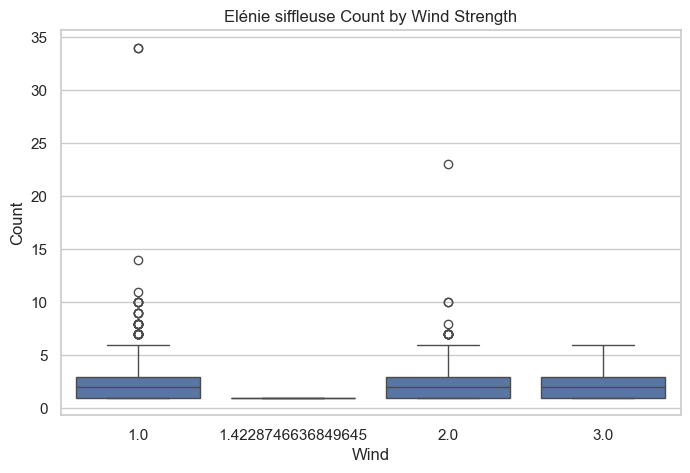

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data_species, x='vent', y='total_AV_avec_vol')
plt.xlabel("Wind")
plt.ylabel("Count")
plt.title("Elénie siffleuse Count by Wind Strength")
plt.show()

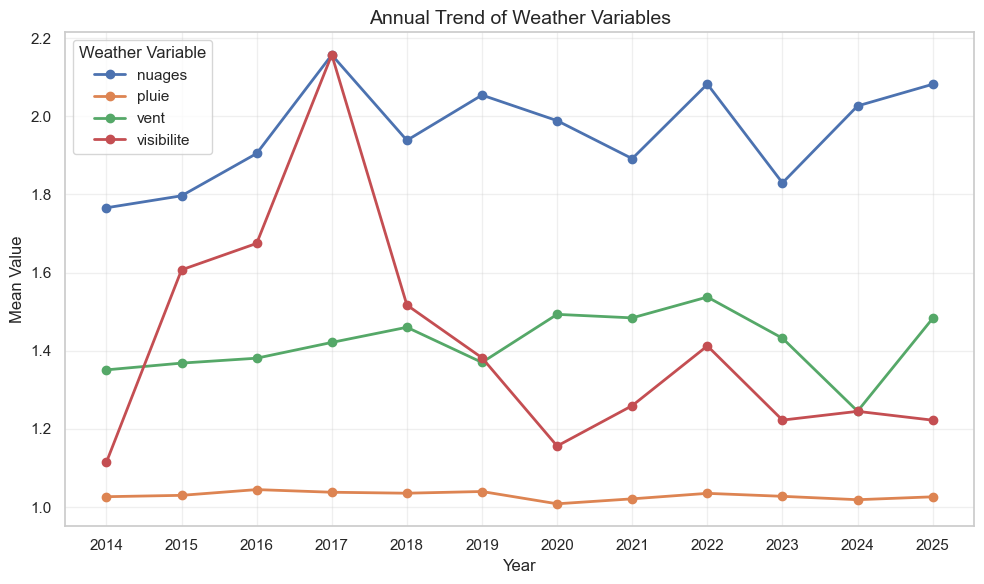

In [ ]:
# %% [markdown]
# ## Annual Trend of Weather Variables / 年度天气指标趋势

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set style
sns.set(style="whitegrid")

# 将天气列转换为数值 / Ensure numeric type
weather_cols = ['nuages', 'pluie', 'vent', 'visibilite']
obs_data_cleaned[weather_cols] = obs_data_cleaned[weather_cols].apply(pd.to_numeric, errors='coerce')

# 按年份计算平均值 / Aggregate yearly mean
annual_weather = obs_data_cleaned.groupby('year')[weather_cols].mean().reset_index()

# %% [markdown]
# ### 绘制年度折线图 / Plot annual trend

# %%
plt.figure(figsize=(10,6))

# 遍历天气列绘制折线
for col in weather_cols:
    plt.plot(annual_weather['year'], annual_weather[col], marker='o', linewidth=2, label=col)

plt.title("Annual Trend of Weather Variables", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(annual_weather['year'])
plt.grid(True, alpha=0.3)
plt.legend(title="Weather Variable")
plt.tight_layout()
plt.show()

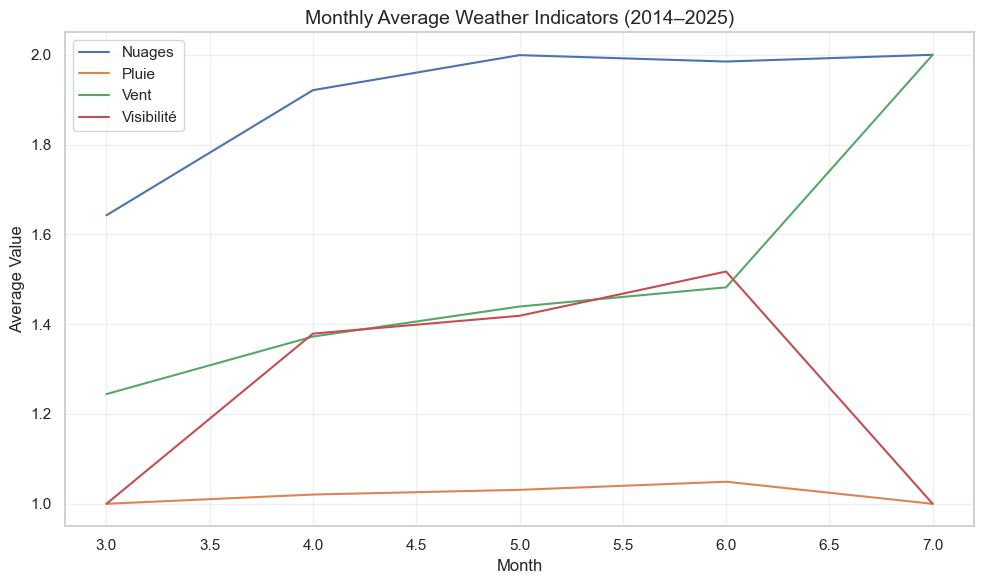

In [ ]:
# %% [markdown]
# ## 月尺度天气变化趋势图
# ## Monthly Weather Trends (nuages, pluie, vent, visibilite)

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 按月聚合（取平均值）
monthly_weather = (
    obs_data_cleaned
    .groupby(['year', 'month'])[['nuages', 'pluie', 'vent', 'visibilite']]
    .mean()
    .reset_index()
)

# 为了展示总体月度趋势，可以按月份再平均一次（跨年度）
monthly_mean_weather = (
    monthly_weather
    .groupby('month')[['nuages', 'pluie', 'vent', 'visibilite']]
    .mean()
    .reset_index()
)

# 绘制折线图
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_mean_weather, x='month', y='nuages', label='Nuages')
sns.lineplot(data=monthly_mean_weather, x='month', y='pluie', label='Pluie')
sns.lineplot(data=monthly_mean_weather, x='month', y='vent', label='Vent')
sns.lineplot(data=monthly_mean_weather, x='month', y='visibilite', label='Visibilité')

plt.title("Monthly Average Weather Indicators (2014–2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# %% [markdown]
# ## Annual Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年极端天气观测数量

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 确保 year 和 month 列存在 / Ensure year and month columns exist
# obs_data_cleaned['year'], obs_data_cleaned['month']

# 按年份和月份统计极端天气数量 / Count extreme weather per month
monthly_extreme_counts = (
    obs_data_cleaned[obs_data_cleaned["is_extreme_weather"]]
    .groupby(["year"])
    .size()
    .reset_index(name="extreme_count")
)

# 查看前几行 / Preview
monthly_extreme_counts


,year,extreme_count
0,2014,299
1,2015,720
2,2016,1003
3,2017,1060
4,2018,1140
5,2019,673
6,2020,624
7,2021,672
8,2022,945
9,2023,958


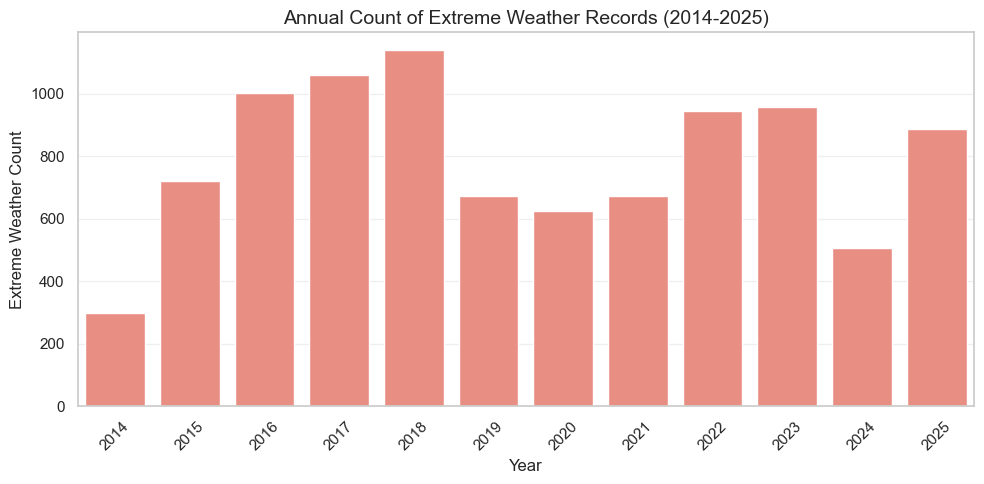

In [ ]:
# %% [markdown]
# ## Annual Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年极端天气观测数量柱状图

# %%
plt.figure(figsize=(10,5))

# 绘制柱状图 / Bar plot
sns.barplot(
    data=monthly_extreme_counts,
    x="year",
    y="extreme_count",
    color='salmon'
)

plt.title("Annual Count of Extreme Weather Records (2014-2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Extreme Weather Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)  # 仅显示y轴网格
plt.tight_layout()
plt.show()

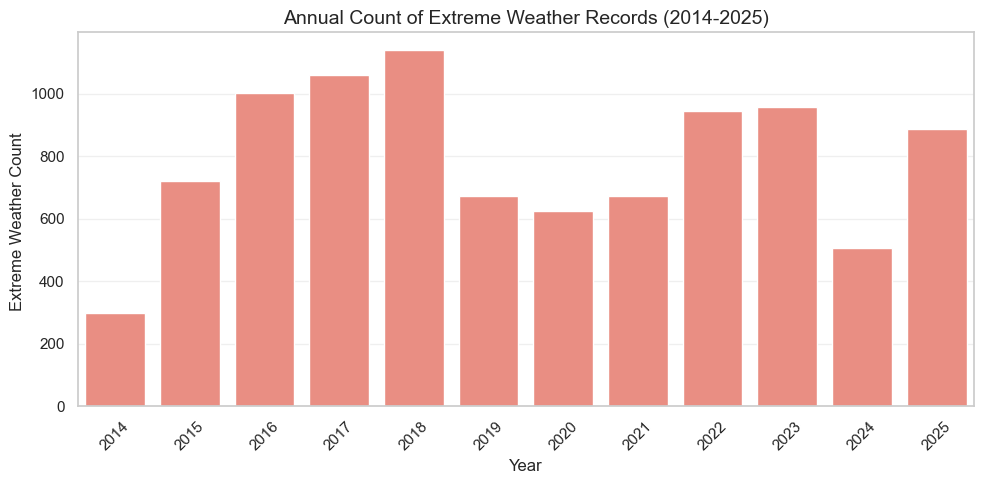

In [ ]:
# %% [markdown]
# ## Annual Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年极端天气观测数量柱状图

# %%
plt.figure(figsize=(10,5))

# 绘制柱状图 / Bar plot
sns.barplot(
    data=monthly_extreme_counts,
    x="year",
    y="extreme_count",
    color='salmon'
)

plt.title("Annual Count of Extreme Weather Records (2014-2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Extreme Weather Count ", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)  # 仅显示y轴网格
plt.tight_layout()
plt.show()

In [ ]:
# %% [markdown]
# ## Monthly Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每个月极端天气观测数量

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 确保 year 和 month 列存在 / Ensure year and month columns exist
# obs_data_cleaned['year'], obs_data_cleaned['month']

# 按年份和月份统计极端天气数量 / Count extreme weather per month
monthly_extreme_counts = (
    obs_data_cleaned[obs_data_cleaned["is_extreme_weather"]]
    .groupby(["year", "month"])
    .size()
    .reset_index(name="extreme_count")
)

# 查看前几行 / Preview
monthly_extreme_counts

,year,month,extreme_count
0,2014,4,163
1,2014,5,71
2,2014,6,65
3,2015,4,187
4,2015,5,305
5,2015,6,228
6,2016,4,215
7,2016,5,549
8,2016,6,239
9,2017,4,305


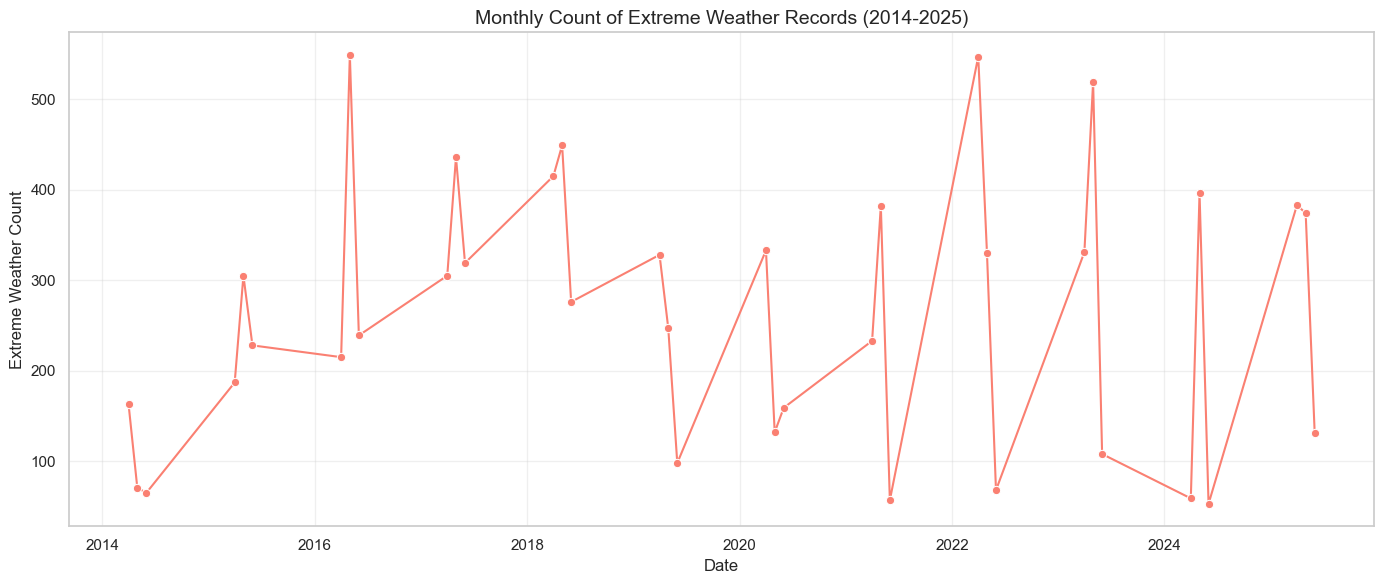

In [ ]:

# 绘制折线图 / Line plot
plt.figure(figsize=(14,6))
sns.lineplot(
    data=monthly_extreme_counts,
    x=pd.to_datetime(monthly_extreme_counts.assign(day=1)[['year','month','day']]),
    y="extreme_count",
    marker='o',
    color='salmon'
)
plt.title("Monthly Count of Extreme Weather Records (2014-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Extreme Weather Count", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/3320309204.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


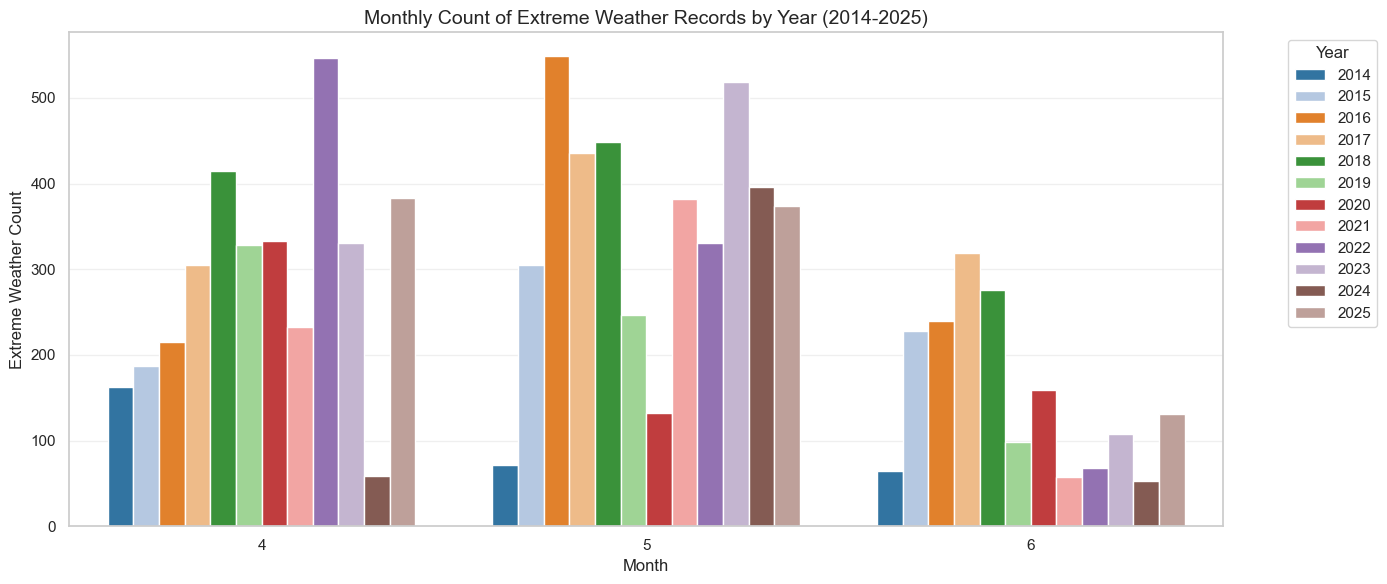

In [ ]:
# %% [markdown]
# ## Annual & Monthly Count of Extreme Weather Records (2014-2025)
# ## 2014-2025每年每月极端天气观测数量柱状图

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# 按年份和月份统计极端天气数量 / Count extreme weather per year and month
year_month_extreme = (
    obs_data_cleaned[obs_data_cleaned["is_extreme_weather"]]
    .groupby(["year", "month"])
    .size()
    .reset_index(name="extreme_count")
)

# 绘制柱状图 / Bar plot
plt.figure(figsize=(14,6))
sns.barplot(
    data=year_month_extreme,
    x="month",
    y="extreme_count",
    hue="year",          # 用年份区分颜色
    palette="tab20",
    ci=None              # 关闭置信区间线
)

plt.title("Monthly Count of Extreme Weather Records by Year (2014-2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Extreme Weather Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Year", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# # %% [markdown]
# # # Poisson GLM for Elénie siffleuse Count
# # # 使用 Poisson GLM 分析 Elénie siffleuse 鸟类数量随时间和天气的变化

# # %%
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set(style="whitegrid")

# # %% [markdown]
# # ## 1. 数据准备 / Data Preparation

# # %%
# # 选择目标物种 / Filter target species
# species = "Elénie siffleuse"
# data_species = obs_data_cleaned[obs_data_cleaned["ESPECE"] == species].copy()

# # 去掉计数为NaN的行 / Drop rows with NaN counts
# data_species = data_species.dropna(subset=["total_AV_avec_vol"])

# # 将月份和年份转换为类别型 / Convert month and year to categorical
# data_species["month"] = data_species["month"].astype("category")
# data_species["year"] = data_species["year"].astype("category")

# # %% [markdown]
# # ## 2. 拟合 Poisson GLM / Fit Poisson GLM
# # 响应变量: total_AV_avec_vol  
# # 协变量: year, month, vent, pluie, visibilite  

# # %%
# formula = "total_AV_avec_vol ~ year + month + vent + pluie + visibilite"

# poisson_model = smf.glm(formula=formula, data=data_species,
#                         family=sm.families.Poisson()).fit()

# print(poisson_model.summary())

# # %% [markdown]
# # ## 3. 年度总数预测 / Annual Total Count Prediction
# # 使用模型预测每年的总数量，并计算 95% 置信区间

# # %%
# # 构建每年预测数据 / Create yearly prediction dataframe
# yearly_df = data_species.groupby("year")[["year", "vent", "pluie", "visibilite"]].mean().reset_index()
# yearly_df = sm.add_constant(yearly_df, has_constant='add')

# # 预测 / Predict
# pred_yearly = poisson_model.get_prediction(yearly_df)
# pred_yearly_summary = pred_yearly.summary_frame(alpha=0.05)  # 95% CI

# yearly_df["mean_count"] = pred_yearly_summary["mean"]
# yearly_df["ci_lower"] = pred_yearly_summary["mean_ci_lower"]
# yearly_df["ci_upper"] = pred_yearly_summary["mean_ci_upper"]

# # %% [markdown]
# # ### 绘制年度总数量折线图 / Plot Annual Total Count

# # %%
# plt.figure(figsize=(10,6))
# plt.plot(yearly_df["year"], yearly_df["mean_count"], marker='o', color='steelblue', label=species)
# plt.fill_between(yearly_df["year"], yearly_df["ci_lower"], yearly_df["ci_upper"], alpha=0.3, color='skyblue', label="95% CI")
# plt.title(f"Annual Total Count of {species} with Weather Effects (Poisson GLM)")
# plt.xlabel("Year / 年份")
# plt.ylabel("Predicted Total Count / 预测总数")
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# # %% [markdown]
# # ## 4. 月度平均趋势 / Monthly Average Trend
# # 对每个月进行预测，并平均跨年得到月度趋势

# # %%
# # 构建每月预测数据 / Create monthly prediction dataframe
# monthly_df = data_species.groupby("month")[["month", "vent", "pluie", "visibilite"]].mean().reset_index()
# monthly_df = sm.add_constant(monthly_df, has_constant='add')

# # 预测 / Predict
# pred_monthly = poisson_model.get_prediction(monthly_df)
# pred_monthly_summary = pred_monthly.summary_frame(alpha=0.05)

# monthly_df["mean_count"] = pred_monthly_summary["mean"]
# monthly_df["ci_lower"] = pred_monthly_summary["mean_ci_lower"]
# monthly_df["ci_upper"] = pred_monthly_summary["mean_ci_upper"]

# # %% [markdown]
# # ### 绘制月度趋势折线图 / Plot Monthly Trend

# # %%
# plt.figure(figsize=(10,6))
# plt.plot(monthly_df["month"], monthly_df["mean_count"], marker='o', color='coral', label=species)
# plt.fill_between(monthly_df["month"], monthly_df["ci_lower"], monthly_df["ci_upper"], alpha=0.3, color='lightcoral', label="95% CI")
# plt.title(f"Mean Monthly Count of {species} (2014-2025) with Weather Effects")
# plt.xlabel("Month / 月份")
# plt.ylabel("Predicted Mean Count / 预测平均计数")
# plt.xticks(range(1,13))
# plt.grid(alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:      total_AV_avec_vol   No. Observations:                 9820
Model:                            GLM   Df Residuals:                     9801
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15561.
Date:                Thu, 06 Nov 2025   Deviance:                       6230.7
Time:                        14:00:02   Pearson chi2:                 7.66e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01194
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8424      0.185      4.554   

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/1590338380.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_df = data_species.groupby("year")[["year", "vent", "pluie", "visibilite"]].mean().reset_index()


TypeError: category dtype does not support aggregation 'mean'

In [ ]:
obs_data_cleaned

In [ ]:
# %% [markdown]
# ## Check if sum of all total columns is zero
# ## 检查四个 total 列总和是否为0

total_cols = [
    'total_Auditif', 
    'total_Visuel_sans_vol', 
    'total_AV_sans_vol', 
    'total_AV_avec_vol'
]

# 计算每行总和
obs_data_cleaned['total_sum'] = obs_data_cleaned[total_cols].sum(axis=1)

# 检查总和为0的行数
num_total_zero = (obs_data_cleaned['total_sum'] == 0).sum()
print(f"Number of rows where all totals sum to 0: {num_total_zero}")

# 查看前几条总和为0的记录
obs_data_cleaned[obs_data_cleaned['total_sum'] == 0].head()

In [ ]:
# === 2) 选择要分析的物种 ===
# 方案A：自动选择总计数Top-K & 出现频次Top-K 的并集（更稳健）
K = 4  # 你也可以改为 5 或 6

tot = (df.groupby(colmap["species"], dropna=False)[colmap["count"]]
         .sum().sort_values(ascending=False))
freq = (df.assign(present = df[colmap["count"]] > 0)
          .groupby([colmap["species"], colmap["year"]])[ "present" ]
          .any().groupby(level=0).sum().sort_values(ascending=False))

auto_species = list(pd.Index(tot.head(K).index).union(freq.head(K).index))

# 方案B：手动指定（如需）
manual_species = []  # 例如 ["Parus major", "Columba palumbus"]

species_list = manual_species if manual_species else auto_species
species_list


In [56]:
obs_data_cleaned.columns


Index(['Nom_observateur', 'code_departement', 'Nom_transect', 'date',
       'passage', 'nuages', 'pluie', 'vent', 'visibilite', 'N_point',
       'heure_debut', 'ESPECE', 'dist_25m_Auditif', 'dist_25m_Visuel',
       'dist_50m_Auditif', 'dist_50m_Visuel', 'dist_100m_Auditif',
       'dist_100m_Visuel', 'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
       'vol', 'total_Auditif', 'total_Visuel_sans_vol', 'total_AV_sans_vol',
       'total_AV_avec_vol', 'is_duplicate'],
      dtype='object')

/home/chan/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Estimated annual change: 1.83% (95% CI: -13.56% – 19.98%)


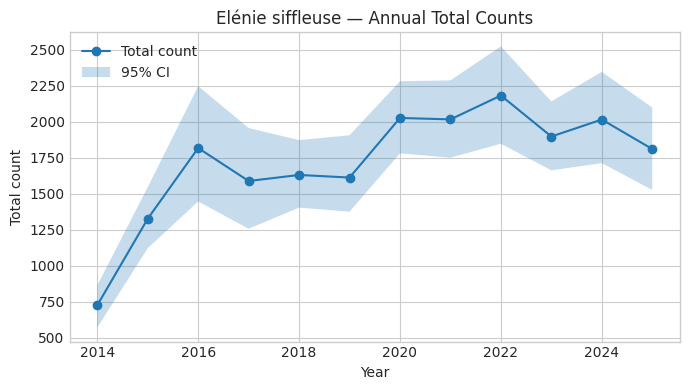

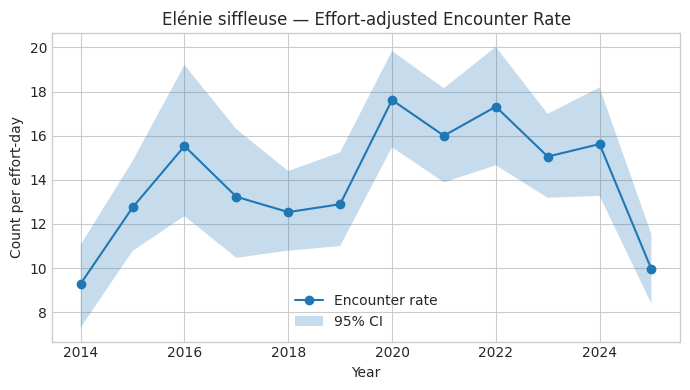

,year,effort_days,count_total,count_lo,count_hi,encounter_rate,enc_lo,enc_hi
0,2014,78.0,725.0,569.975,863.025,9.294872,7.307372,11.064423
1,2015,104.0,1326.0,1121.000,1545.025,12.750000,10.778846,14.856010
2,2016,117.0,1817.0,1445.950,2247.050,15.529915,12.358547,19.205556
3,2017,120.0,1588.0,1256.000,1956.025,13.233333,10.466667,16.300208
4,2018,130.0,1630.0,1403.000,1872.125,12.538462,10.792308,14.400962
5,2019,125.0,1612.0,1374.850,1906.025,12.896000,10.998800,15.248200
6,2020,115.0,2026.0,1780.000,2281.075,17.617391,15.478261,19.835435
7,2021,126.0,2016.0,1749.900,2287.100,16.000000,13.888095,18.151587
8,2022,126.0,2182.0,1846.875,2523.225,17.317460,14.657738,20.025595
9,2023,126.0,1897.0,1662.000,2141.050,15.055556,13.190476,16.992460


In [58]:
# ================================================================
# Species-level analysis for "Elénie siffleuse" on your schema
# Uses: ESPECE, date, Nom_transect, total_AV_avec_vol
# ================================================================
import os, math, numpy as np, pandas as pd, matplotlib.pyplot as plt

species = "Elénie siffleuse"

# ---- columns (based on your header) ----
COL_SPECIES   = "ESPECE"
COL_DATE      = "date"            # <- lowercase
COL_TRANSECT  = "Nom_transect"
COL_COUNT_P   = "total_AV_avec_vol"   # preferred count column
COL_COUNT_FALLBACKS = ["total_AV_sans_vol", "total_Auditif", "total_Visuel_sans_vol"]

df = obs_data_cleaned.copy()

# ensure count column exists (fallback if needed)
count_col = COL_COUNT_P if COL_COUNT_P in df.columns else None
if count_col is None:
    for c in COL_COUNT_FALLBACKS:
        if c in df.columns:
            count_col = c
            break
if count_col is None:
    raise RuntimeError("找不到计数字段：请至少提供 total_AV_avec_vol / total_AV_sans_vol / total_Auditif / total_Visuel_sans_vol 之一。")

# parse dates & derive year
df[COL_DATE] = pd.to_datetime(df[COL_DATE], errors="coerce")
df["year"]   = df[COL_DATE].dt.year

# global effort per year: unique (transect, date) pairs across ALL data
effort_per_year = (
    df.dropna(subset=[COL_TRANSECT, COL_DATE])
      .drop_duplicates([COL_TRANSECT, COL_DATE])
      .groupby("year")[COL_TRANSECT].count()
      .rename("effort_days")
)

# focus species
sp = df[df[COL_SPECIES] == species].copy()
sp[count_col] = sp[count_col].fillna(0)

# analysis years (clip to 2014–2025 if在范围内)
ymin, ymax = int(df["year"].min()), int(df["year"].max())
years = np.arange(max(2014, ymin), min(2025, ymax) + 1)

# bootstrap helper
rng = np.random.default_rng(2025)
def bootstrap_ci(values, statfunc=np.sum, B=1000, alpha=0.05):
    v = np.asarray(values, float)
    if v.size == 0:
        return np.nan, np.nan
    boots = [statfunc(rng.choice(v, size=v.size, replace=True)) for _ in range(B)]
    return float(np.quantile(boots, alpha/2)), float(np.quantile(boots, 1 - alpha/2))

# per-year metrics
rows = []
for y in years:
    suby = sp[sp["year"] == y]
    # aggregate per day across transects/points
    day_counts = suby.groupby(COL_DATE)[count_col].sum()
    total_count = float(day_counts.sum())
    eff = float(effort_per_year.get(y, np.nan))
    enc = (total_count / eff) if (eff and eff > 0 and not math.isnan(eff)) else np.nan

    lo_c, hi_c = bootstrap_ci(day_counts.values, np.sum)
    lo_e, hi_e = ((lo_c/eff, hi_c/eff) if (eff and eff > 0 and not math.isnan(eff)) else (np.nan, np.nan))

    rows.append({
        "year": y,
        "effort_days": eff,
        "count_total": total_count, "count_lo": lo_c, "count_hi": hi_c,
        "encounter_rate": enc, "enc_lo": lo_e, "enc_hi": hi_e
    })

df_sp = pd.DataFrame(rows)

# try GLM with offset; fallback to Poisson if NB fails; skip if too few points
annual_change_txt = "GLM未拟合（有效年份不足或数据为空）。"
try:
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    sub = df_sp.dropna(subset=["effort_days"]).copy()
    sub = sub[(sub["effort_days"] > 0)]
    if len(sub) >= 4:
        sub["year_c"] = sub["year"] - sub["year"].mean()
        try:
            model = smf.glm("count_total ~ year_c", data=sub,
                            family=sm.families.NegativeBinomial(),
                            offset=np.log(sub["effort_days"])).fit()
        except Exception:
            model = smf.glm("count_total ~ year_c", data=sub,
                            family=sm.families.Poisson(),
                            offset=np.log(sub["effort_days"])).fit()
        b, se = float(model.params.get("year_c", np.nan)), float(model.bse.get("year_c", np.nan))
        pct  = (np.exp(b) - 1) * 100
        lo   = (np.exp(b - 1.96*se) - 1) * 100
        hi   = (np.exp(b + 1.96*se) - 1) * 100
        annual_change_txt = f"Estimated annual change: {pct:.2f}% (95% CI: {lo:.2f}% – {hi:.2f}%)"
    print(annual_change_txt)
except Exception as e:
    print("statsmodels 不可用或拟合失败：", e)

# safe filename slug
def slugify(s: str) -> str:
    m = (s.lower().replace(" ", "_")
               .replace("é","e").replace("è","e").replace("ê","e")
               .replace("à","a").replace("ï","i").replace("ô","o"))
    return "".join(ch for ch in m if ch.isalnum() or ch in "_-")

os.makedirs("figures", exist_ok=True)
slug = slugify(species)

# plots
plt.figure(figsize=(7,4))
plt.plot(df_sp["year"], df_sp["count_total"], marker="o", label="Total count")
plt.fill_between(df_sp["year"], df_sp["count_lo"], df_sp["count_hi"], alpha=0.25, label="95% CI")
plt.title(f"{species} — Annual Total Counts")
plt.xlabel("Year"); plt.ylabel("Total count"); plt.legend(); plt.tight_layout()
plt.savefig(f"figures/{slug}_count.png", dpi=180); plt.show()

plt.figure(figsize=(7,4))
plt.plot(df_sp["year"], df_sp["encounter_rate"], marker="o", label="Encounter rate")
plt.fill_between(df_sp["year"], df_sp["enc_lo"], df_sp["enc_hi"], alpha=0.25, label="95% CI")
plt.title(f"{species} — Effort-adjusted Encounter Rate")
plt.xlabel("Year"); plt.ylabel("Count per effort-day"); plt.legend(); plt.tight_layout()
plt.savefig(f"figures/{slug}_encounter.png", dpi=180); plt.show()

# df_sp.head()
# 显示后恢复默认设置
with pd.option_context('display.max_rows', None):
    display(df_sp)

/home/chan/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/chan/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


=== Baseline specification ===
Count column: total_AV_avec_vol, Effort: transect-day
Annual change = 1.83% (95% CI: -13.56%–19.98%), Dispersion=0.04

=== Robustness A: count = total_AV_sans_vol (exclude flights) ===
Annual change = 2.10% (95% CI: -13.34%–20.29%), Dispersion=0.04


/home/chan/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



=== Robustness B: effort = unique dates per year ===
Annual change = 3.26% (95% CI: -12.35%–21.66%), Dispersion=0.04


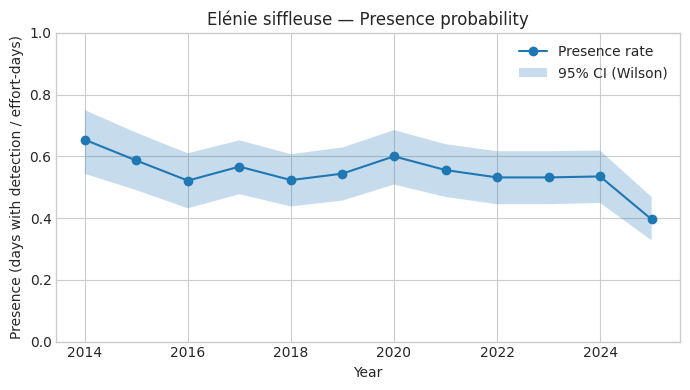

,specification,annual_change_pct,ci_low,ci_high,dispersion_pearson_over_df
0,Baseline,1.834663,-13.564833,19.977771,0.035259
1,Robustness A (no flights),2.096892,-13.342301,20.286778,0.038721
2,Robustness B (date-only effort),3.264175,-12.351290,21.661685,0.042909


In [60]:
# ================================================================
# Species-level: diagnostics + robustness + presence plot (single cell)
# Schema: ESPECE, date, Nom_transect, total_AV_avec_vol (fallbacks supported)
# ================================================================
import os, math, numpy as np, pandas as pd, matplotlib.pyplot as plt

# ---- species & columns ----
species        = "Elénie siffleuse"
COL_SPECIES    = "ESPECE"
COL_DATE       = "date"
COL_TRANSECT   = "Nom_transect"
PRIMARY_COUNT  = "total_AV_avec_vol"
ALT_COUNT_1    = "total_AV_sans_vol"       # 健壮性检查：去掉飞行个体
COUNT_FALLBACKS = ["total_AV_sans_vol", "total_Auditif", "total_Visuel_sans_vol"]

df_all = obs_data_cleaned.copy()
df_all[COL_DATE] = pd.to_datetime(df_all[COL_DATE], errors="coerce")
df_all["year"]   = df_all[COL_DATE].dt.year

def _pick_count_column(df, prefer=PRIMARY_COUNT):
    if prefer in df.columns:
        return prefer
    for c in COUNT_FALLBACKS:
        if c in df.columns:
            return c
    raise RuntimeError("No count column found. Need one of: "
                       f"{[PRIMARY_COUNT]+COUNT_FALLBACKS}")

def _effort_transect_day(df):
    """ effort = #unique (transect, date) per year """
    return (df.dropna(subset=[COL_TRANSECT, COL_DATE])
              .drop_duplicates([COL_TRANSECT, COL_DATE])
              .groupby("year")[COL_TRANSECT].count()
              .rename("effort_days"))

def _effort_date_only(df):
    """ robustness: effort = #unique date per year """
    return (df.dropna(subset=[COL_DATE])
              .drop_duplicates([COL_DATE])
              .groupby("year")[COL_DATE].count()
              .rename("effort_days"))

rng = np.random.default_rng(2025)
def _bootstrap_ci(values, statfunc=np.sum, B=1000, alpha=0.05):
    v = np.asarray(values, float)
    if v.size == 0:
        return np.nan, np.nan
    boots = [statfunc(rng.choice(v, size=v.size, replace=True)) for _ in range(B)]
    return float(np.quantile(boots, alpha/2)), float(np.quantile(boots, 1 - alpha/2))

def _per_year_metrics(df_all, species, count_col, effort_series):
    sp = df_all[df_all[COL_SPECIES] == species].copy()
    sp[count_col] = sp[count_col].fillna(0)
    ymin, ymax = int(df_all["year"].min()), int(df_all["year"].max())
    years = np.arange(max(2014, ymin), min(2025, ymax) + 1)

    rows = []
    for y in years:
        suby = sp[sp["year"] == y]
        day_counts = suby.groupby(COL_DATE)[count_col].sum()
        total_count = float(day_counts.sum())
        eff = float(effort_series.get(y, np.nan))
        enc = (total_count / eff) if (eff and eff > 0 and not math.isnan(eff)) else np.nan

        lo_c, hi_c = _bootstrap_ci(day_counts.values, np.sum)
        lo_e, hi_e = ((lo_c/eff, hi_c/eff) if (eff and eff > 0 and not math.isnan(eff))
                      else (np.nan, np.nan))
        rows.append({
            "year": y, "effort_days": eff,
            "count_total": total_count, "count_lo": lo_c, "count_hi": hi_c,
            "encounter_rate": enc, "enc_lo": lo_e, "enc_hi": hi_e
        })
    return pd.DataFrame(rows)

def _fit_glm_change(df_sp):
    """ GLM with log-offset; returns (txt, pct, lo, hi, disp) """
    try:
        import statsmodels.formula.api as smf
        import statsmodels.api as sm
    except Exception:
        return "statsmodels unavailable", np.nan, np.nan, np.nan, np.nan

    sub = df_sp.dropna(subset=["effort_days"]).copy()
    sub = sub[(sub["effort_days"] > 0)]
    if len(sub) < 4:
        return "Too few years for GLM", np.nan, np.nan, np.nan, np.nan

    sub["year_c"] = sub["year"] - sub["year"].mean()
    try:
        model = smf.glm("count_total ~ year_c", data=sub,
                        family=sm.families.NegativeBinomial(),
                        offset=np.log(sub["effort_days"])).fit()
    except Exception:
        model = smf.glm("count_total ~ year_c", data=sub,
                        family=sm.families.Poisson(),
                        offset=np.log(sub["effort_days"])).fit()
    b  = float(model.params.get("year_c", np.nan))
    se = float(model.bse.get("year_c", np.nan))
    pct = (np.exp(b) - 1) * 100
    lo  = (np.exp(b - 1.96*se) - 1) * 100
    hi  = (np.exp(b + 1.96*se) - 1) * 100
    disp = float(model.pearson_chi2 / model.df_resid) if model.df_resid>0 else np.nan
    txt = f"Annual change = {pct:.2f}% (95% CI: {lo:.2f}%–{hi:.2f}%), Dispersion={disp:.2f}"
    return txt, pct, lo, hi, disp

def _slug(s: str) -> str:
    m = (s.lower().replace(" ", "_")
               .replace("é","e").replace("è","e").replace("ê","e")
               .replace("à","a").replace("ï","i").replace("ô","o"))
    return "".join(ch for ch in m if ch.isalnum() or ch in "_-")

# ---------------- Baseline: count = total_AV_avec_vol, effort = transect-day
count_col_base = _pick_count_column(df_all, prefer=PRIMARY_COUNT)
eff_base = _effort_transect_day(df_all)
df_base = _per_year_metrics(df_all, species, count_col_base, eff_base)
txt_base, pct_base, lo_base, hi_base, disp_base = _fit_glm_change(df_base)

print("=== Baseline specification ===")
print(f"Count column: {count_col_base}, Effort: transect-day")
print(txt_base)

# ---------------- Robustness A: change count column (exclude flights) ----------------
if ALT_COUNT_1 in df_all.columns:
    df_altA = _per_year_metrics(df_all, species, ALT_COUNT_1, eff_base)
    txt_A, pct_A, lo_A, hi_A, disp_A = _fit_glm_change(df_altA)
    print("\n=== Robustness A: count = total_AV_sans_vol (exclude flights) ===")
    print(txt_A)
else:
    txt_A = "ALT column not available"
    print("\n=== Robustness A skipped: total_AV_sans_vol not found ===")

# ---------------- Robustness B: change effort definition (date-only) ----------------
eff_altB = _effort_date_only(df_all)
df_altB = _per_year_metrics(df_all, species, count_col_base, eff_altB)
txt_B, pct_B, lo_B, hi_B, disp_B = _fit_glm_change(df_altB)
print("\n=== Robustness B: effort = unique dates per year ===")
print(txt_B)

# ---------------- Presence rate with Wilson CI ----------------
from statsmodels.stats.proportion import proportion_confint

pres_rows = []
sp = df_all[df_all[COL_SPECIES] == species].copy()
sp[count_col_base] = sp[count_col_base].fillna(0)
for _, r in df_base.iterrows():
    y = int(r["year"])
    eff = int(r["effort_days"]) if not pd.isna(r["effort_days"]) else 0
    if eff <= 0:
        pres_rows.append({"year": y, "presence": np.nan, "lo": np.nan, "hi": np.nan})
        continue
    days_present = (sp[sp["year"]==y]
                    .groupby(COL_DATE)[count_col_base].sum()
                    .gt(0).sum())
    pres = days_present / eff
    lo, hi = proportion_confint(days_present, eff, method="wilson")
    pres_rows.append({"year": y, "presence": pres, "lo": lo, "hi": hi})

pres = pd.DataFrame(pres_rows).sort_values("year")

# ---- Plot presence rate ----
os.makedirs("figures", exist_ok=True)
slug = _slug(species)

plt.figure(figsize=(7,4))
plt.plot(pres["year"], pres["presence"], marker="o", label="Presence rate")
plt.fill_between(pres["year"], pres["lo"], pres["hi"], alpha=0.25, label="95% CI (Wilson)")
plt.ylim(0, 1)
plt.xlabel("Year"); plt.ylabel("Presence (days with detection / effort-days)")
plt.title(f"{species} — Presence probability")
plt.legend(); plt.tight_layout()
plt.savefig(f"figures/{slug}_presence.png", dpi=180)
plt.show()

# ---- Quick comparison table to paste in report (optional display) ----
summary = pd.DataFrame({
    "specification": ["Baseline", "Robustness A (no flights)", "Robustness B (date-only effort)"],
    "annual_change_pct": [pct_base, (pct_A if 'pct_A' in locals() else np.nan), pct_B],
    "ci_low": [lo_base, (lo_A if 'lo_A' in locals() else np.nan), lo_B],
    "ci_high": [hi_base, (hi_A if 'hi_A' in locals() else np.nan), hi_B],
    "dispersion_pearson_over_df": [disp_base, (disp_A if 'disp_A' in locals() else np.nan), disp_B]
})
summary


In [ ]:
# ================================================================
# Seasonal pattern analysis for "Elénie siffleuse"
# ================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal

species = "Elénie siffleuse"

COL_SPECIES   = "ESPECE"
COL_DATE      = "date"
COL_TRANSECT  = "Nom_transect"
COL_COUNT     = "total_AV_avec_vol"  # same as baseline

df = obs_data_cleaned.copy()
df[COL_DATE] = pd.to_datetime(df[COL_DATE], errors="coerce")
df = df[df[COL_SPECIES] == species].copy()
df["year"] = df[COL_DATE].dt.year
df["month"] = df[COL_DATE].dt.month

# restrict to years with consistent data
df = df[(df["year"] >= 2014) & (df["year"] <= 2025)]

# define monthly effort = number of unique (transect, date)
effort_month = (
    obs_data_cleaned.drop_duplicates([COL_TRANSECT, COL_DATE])
    .assign(month=obs_data_cleaned["date"].dt.month)
    .groupby("month")[COL_TRANSECT]
    .count()
    .rename("effort_days")
)

# compute monthly total counts and encounter rates
records = []
for m in range(1, 13):
    sub = df[df["month"] == m]
    total_count = sub[COL_COUNT].sum()
    eff = float(effort_month.get(m, np.nan))
    enc = total_count / eff if eff and eff > 0 else np.nan
    records.append({
        "month": m,
        "total_count": total_count,
        "effort_days": eff,
        "encounter_rate": enc
    })

df_month = pd.DataFrame(records)

# ------------------------------------------------------------
# Kruskal–Wallis test: do encounter rates differ across months?
# ------------------------------------------------------------
# We use daily-level encounter data for more sensitivity
daily = (df.groupby(df[COL_DATE].dt.month)[COL_COUNT]
           .sum().reset_index())
daily.columns = ["month", "count"]
groups = [daily.loc[daily["month"] == m, "count"].values for m in range(1, 13) if m in daily["month"].unique()]
if len(groups) > 1:
    stat, pval = kruskal(*groups)
    print(f"Kruskal–Wallis H-test for seasonal difference: H={stat:.2f}, p={pval:.4f}")
    if pval < 0.05:
        print("→ Significant seasonal variation in encounter rates.")
    else:
        print("→ No statistically significant seasonal difference detected.")
else:
    print("Not enough month groups for Kruskal–Wallis test.")

# ------------------------------------------------------------
# Plot seasonal pattern (average across years)
# ------------------------------------------------------------
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(8,4))
plt.plot(df_month["month"], df_month["encounter_rate"], marker="o", color="teal")
plt.title(f"{species} — Seasonal Encounter Rate (Average 2014–2025)")
plt.xticks(np.arange(1,13), months)
plt.xlabel("Month")
plt.ylabel("Encounter rate (count per effort-day)")
plt.tight_layout()
plt.savefig("figures/elenie_siffleuse_seasonal.png", dpi=180)
plt.show()

df_month
